# 재배면적 감소 증명

## 과수 재배 면적 변화 (사과)

In [15]:
import pandas as pd

In [14]:
import mysql.connector 
conn = mysql.connector.connect(
 host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com",
 port = 3306,
 user = "hyun",
 password = "0774",
 database ="AutoFarming"
)
cursor = conn.cursor(buffered=True)

In [15]:
open_field_data = pd.read_sql("SELECT * FROM openfield_fruits",conn)
conn.close()

C:\Users\hyeji\AppData\Local\Temp\ipykernel_3520\3426588947.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  open_field_data = pd.read_sql("SELECT * FROM openfield_fruits",conn)


In [16]:
open_field_data.head()

시도별(1)  종류별(1) year1990 year1990.1 year1991 year1991.1 year1992 year1992.1  \
0  시도별(1)  종류별(1)     ● 사과        ● 배     ● 사과        ● 배     ● 사과        ● 배   
1       계      합계    48833       9058    50595       9495    52985      10339   
2   서울특별시      합계        3         58        0         79        0         85   
3   부산광역시      합계        0         35        0         27        0         12   
4   대구광역시      합계      418          0      426          2      429          0   

  year1993 year1993.1  ... year2019 year2019.1 year2020 year2020.1 year2021  \
0     ● 사과        ● 배  ...     ● 사과        ● 배     ● 사과        ● 배     ● 사과   
1    52297      11009  ...    32954       9615    31598       9091    34359   
2        0         68  ...        0         16        0         16        0   
3        0         12  ...        7         27        7         26       10   
4      447          0  ...       52         16       52         14       80   

  year2021.1 year2022 year2022.1 year2023 year2023.1  
0        ● 배     ● 사과        ● 배     ● 사과        ● 배  
1       9675    34603       9680    33789       9607  
2          7        0          7        0          8  
3         19       11         22       12         25  
4         12       75         10       86          7  

[5 rows x 70 columns]

### DB에서 다운로드 받은 테이블에서 열이름에 year삭제

In [17]:
import re

def remove_year(column_name):
    return re.sub('year', '', column_name)

new_columns = [remove_year(column) for column in open_field_data.columns]
open_field_data.columns = new_columns
open_field_data.head()

시도별(1)  종류별(1)   1990 1990.1   1991 1991.1   1992 1992.1   1993 1993.1  \
0  시도별(1)  종류별(1)   ● 사과    ● 배   ● 사과    ● 배   ● 사과    ● 배   ● 사과    ● 배   
1       계      합계  48833   9058  50595   9495  52985  10339  52297  11009   
2   서울특별시      합계      3     58      0     79      0     85      0     68   
3   부산광역시      합계      0     35      0     27      0     12      0     12   
4   대구광역시      합계    418      0    426      2    429      0    447      0   

   ...   2019 2019.1   2020 2020.1   2021 2021.1   2022 2022.1   2023 2023.1  
0  ...   ● 사과    ● 배   ● 사과    ● 배   ● 사과    ● 배   ● 사과    ● 배   ● 사과    ● 배  
1  ...  32954   9615  31598   9091  34359   9675  34603   9680  33789   9607  
2  ...      0     16      0     16      0      7      0      7      0      8  
3  ...      7     27      7     26     10     19     11     22     12     25  
4  ...     52     16     52     14     80     12     75     10     86      7  

[5 rows x 70 columns]

In [18]:
apple_idx=[]
for idx, val in enumerate(list(open_field_data.loc[0])):
    if val == '● 사과':
        print(str(idx) + ' : '+ val)
        apple_idx.append(idx)
apple_idx

2 : ● 사과
4 : ● 사과
6 : ● 사과
8 : ● 사과
10 : ● 사과
12 : ● 사과
14 : ● 사과
16 : ● 사과
18 : ● 사과
20 : ● 사과
22 : ● 사과
24 : ● 사과
26 : ● 사과
28 : ● 사과
30 : ● 사과
32 : ● 사과
34 : ● 사과
36 : ● 사과
38 : ● 사과
40 : ● 사과
42 : ● 사과
44 : ● 사과
46 : ● 사과
48 : ● 사과
50 : ● 사과
52 : ● 사과
54 : ● 사과
56 : ● 사과
58 : ● 사과
60 : ● 사과
62 : ● 사과
64 : ● 사과
66 : ● 사과
68 : ● 사과


[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68]

In [19]:
apple_df = open_field_data.iloc[:,apple_idx]
apple_df

1990   1991   1992   1993   1994   1995   1996   1997   1998   1999  ...  \
0    ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과  ...   
1   48833  50595  52985  52297  52098  50103  43857  39995  34692  31079  ...   
2       3      0      0      0      0      0      0      0      0      0  ...   
3       0      0      0      0      0      0      0      0      0      0  ...   
4     418    426    429    447    444    448    146    112    102     92  ...   
5      16      1      0      0      0      5     14     14     14      1  ...   
6       0      0      0      0      0      0      0      0      0      1  ...   
7     130    115    109    109     91     58     47     47     36     34  ...   
8       -      -      -      -      -      -      -      -     27     23  ...   
9       -      -      -      -      -      -      -      -      -      -  ...   
10   2445   2282   2158   2126   1860   1785   1198    941    634    517  ...   
11    593    617    552    483    461    464    536    497    427    335  ...   
12   4977   5433   5565   5232   5210   5219   4755   4455   3911   3490  ...   
13   4932   4949   5061   5044   5087   4727   4040   3687   3450   2902  ...   
14    959    982    945    952    966    910   1223   1135   1000    915  ...   
15    270    234    237    249    236    200    445    395    380    294  ...   
16  32721  34099  36355  36021  35911  34322  28966  26173  22241  20128  ...   
17   1369   1457   1574   1634   1832   1965   2487   2539   2470   2347  ...   
18      0      0      0      0      0      0      0      0      0      0  ...   

     2014   2015   2016   2017   2018   2019   2020   2021   2022   2023  
0    ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과   ● 사과  
1   30702  31620  33300  33601  33234  32954  31598  34359  34603  33789  
2       0      0      0      0      0      0      0      0      0      0  
3       1      1      6      3      5      7      7     10     11     12  
4      78     66     81     82     56     52     52     80     75     86  
5      23     24      8      4     16     18     21     13     15     17  
6       0      0      2      0      2      3      3      4      4      3  
7       5      4     20     13     12      6     11     21     21     19  
8       3      4     19     27     32     29     27     14     18     25  
9       -      -     15     10     13     11      1     17      2      2  
10    268    330    295    310    316    341    353    524    519    478  
11    522    721    831    930    947   1092   1124   1579   1630   1679  
12   3877   3984   4087   4024   4056   3929   3645   3594   3703   3738  
13   1358   1283   1600   1574   1437   1436   1297   1534   1564   1448  
14   2078   2223   2360   2525   2643   2698   2449   2033   2317   2227  
15    308    289    554    533    545    557    562    208    218    240  
16  18811  19247  20083  20178  19780  19462  18705  20955  20685  20046  
17   3370   3444   3339   3387   3374   3313   3340   3774   3820   3768  
18      0      0      0      0      0      0      1      0      0      0  

[19 rows x 34 columns]

In [20]:
apple_df.set_index(open_field_data.iloc[:,0],inplace=True)

In [21]:
import numpy as np
apple_df.set_index(open_field_data.iloc[:,0],inplace=True)
apple_df = apple_df.applymap(lambda x: np.nan if x == '-' else x).apply(pd.to_numeric, errors='coerce').fillna(0)
apple_df = apple_df.pivot_table(index=None, columns='시도별(1)', aggfunc='sum')
apple_df.drop(columns=['시도별(1)'],inplace=True)
apple_df.head()

C:\Users\hyeji\AppData\Local\Temp\ipykernel_3520\3352736679.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  apple_df = apple_df.applymap(lambda x: np.nan if x == '-' else x).apply(pd.to_numeric, errors='coerce').fillna(0)


시도별(1)    강원도     경기도    경상남도     경상북도        계  광주광역시  대구광역시  대전광역시  부산광역시  \
1990    593.0  2445.0  1369.0  32721.0  48833.0    0.0  418.0  130.0    0.0   
1991    617.0  2282.0  1457.0  34099.0  50595.0    0.0  426.0  115.0    0.0   
1992    552.0  2158.0  1574.0  36355.0  52985.0    0.0  429.0  109.0    0.0   
1993    483.0  2126.0  1634.0  36021.0  52297.0    0.0  447.0  109.0    0.0   
1994    461.0  1860.0  1832.0  35911.0  52098.0    0.0  444.0   91.0    0.0   

시도별(1)  서울특별시  세종특별자치시  울산광역시  인천광역시   전라남도   전라북도  제주도    충청남도    충청북도  
1990      3.0      0.0    0.0   16.0  270.0  959.0  0.0  4932.0  4977.0  
1991      0.0      0.0    0.0    1.0  234.0  982.0  0.0  4949.0  5433.0  
1992      0.0      0.0    0.0    0.0  237.0  945.0  0.0  5061.0  5565.0  
1993      0.0      0.0    0.0    0.0  249.0  952.0  0.0  5044.0  5232.0  
1994      0.0      0.0    0.0    0.0  236.0  966.0  0.0  5087.0  5210.0

In [22]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1990 to 2023
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   강원도      34 non-null     float64
 1   경기도      34 non-null     float64
 2   경상남도     34 non-null     float64
 3   경상북도     34 non-null     float64
 4   계        34 non-null     float64
 5   광주광역시    34 non-null     float64
 6   대구광역시    34 non-null     float64
 7   대전광역시    34 non-null     float64
 8   부산광역시    34 non-null     float64
 9   서울특별시    34 non-null     float64
 10  세종특별자치시  34 non-null     float64
 11  울산광역시    34 non-null     float64
 12  인천광역시    34 non-null     float64
 13  전라남도     34 non-null     float64
 14  전라북도     34 non-null     float64
 15  제주도      34 non-null     float64
 16  충청남도     34 non-null     float64
 17  충청북도     34 non-null     float64
dtypes: float64(18)
memory usage: 6.1+ KB


In [23]:
new_index = apple_df.index.astype(int)
new_index

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int32')

In [24]:
apple_df.set_index(new_index,inplace=True)

In [25]:
apple_df['수도권'] = apple_df['서울특별시'] + apple_df['경기도'] + apple_df['인천광역시']
apple_df['강원권'] = apple_df['강원도']
apple_df['충청권'] = apple_df['대전광역시'] + apple_df['세종특별자치시'] + apple_df['충청남도'] + apple_df['충청북도']
apple_df['호남권'] = apple_df['광주광역시'] + apple_df['전라남도'] + apple_df['전라북도'] 
apple_df['경상권'] = apple_df['경상남도'] + apple_df['경상북도'] + apple_df['대구광역시'] + apple_df['울산광역시']+ apple_df['부산광역시']

In [26]:
apple_df.head()

시도별(1)    강원도     경기도    경상남도     경상북도        계  광주광역시  대구광역시  대전광역시  부산광역시  \
1990    593.0  2445.0  1369.0  32721.0  48833.0    0.0  418.0  130.0    0.0   
1991    617.0  2282.0  1457.0  34099.0  50595.0    0.0  426.0  115.0    0.0   
1992    552.0  2158.0  1574.0  36355.0  52985.0    0.0  429.0  109.0    0.0   
1993    483.0  2126.0  1634.0  36021.0  52297.0    0.0  447.0  109.0    0.0   
1994    461.0  1860.0  1832.0  35911.0  52098.0    0.0  444.0   91.0    0.0   

시도별(1)  서울특별시  ...   전라남도   전라북도  제주도    충청남도    충청북도     수도권    강원권      충청권  \
1990      3.0  ...  270.0  959.0  0.0  4932.0  4977.0  2464.0  593.0  10039.0   
1991      0.0  ...  234.0  982.0  0.0  4949.0  5433.0  2283.0  617.0  10497.0   
1992      0.0  ...  237.0  945.0  0.0  5061.0  5565.0  2158.0  552.0  10735.0   
1993      0.0  ...  249.0  952.0  0.0  5044.0  5232.0  2126.0  483.0  10385.0   
1994      0.0  ...  236.0  966.0  0.0  5087.0  5210.0  1860.0  461.0  10388.0   

시도별(1)     호남권      경상권  
1990    1229.0  34508.0  
1991    1216.0  35982.0  
1992    1182.0  38358.0  
1993    1201.0  38102.0  
1994    1202.0  38187.0  

[5 rows x 23 columns]

In [27]:
from sqlalchemy import create_engine

host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com"
port = 3306
user = "hyun"
password = "0774"
database ="AutoFarming"

engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')

table_name = 'openfield_apple'

apple_df.to_sql(name=table_name, con=engine, if_exists='replace', index=True)

engine.dispose()

ProgrammingError: (mysql.connector.errors.ProgrammingError) 1142 (42000): DROP command denied to user 'hyun'@'211.197.28.14' for table 'openfield_apple'
[SQL: 
DROP TABLE openfield_apple]
(Background on this error at: https://sqlalche.me/e/20/f405)

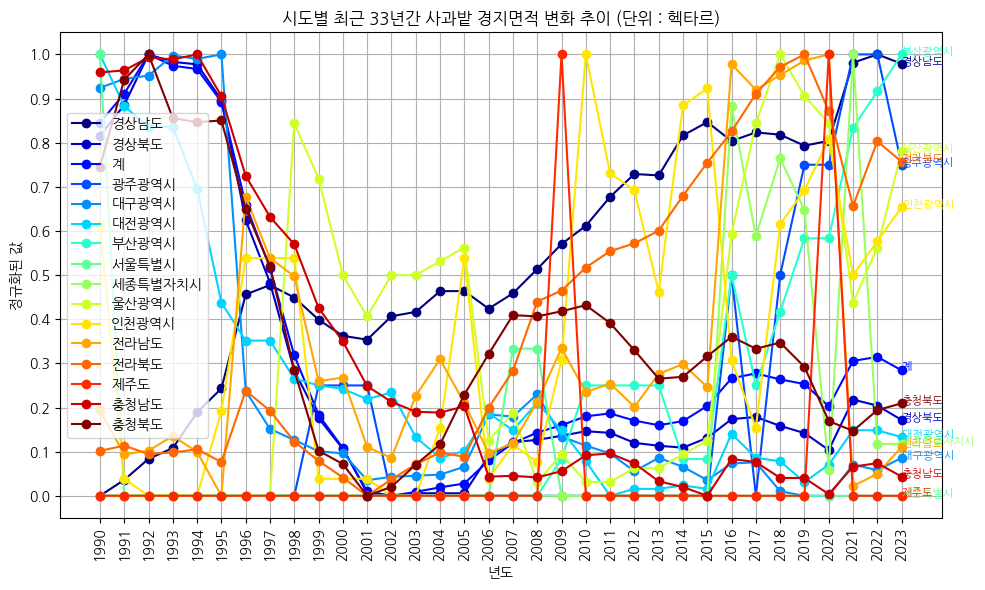

In [30]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')

# 열 데이터 정규화
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(apple_df.iloc[:, 1:]), columns=apple_df.columns[1:])
scaled_df.index = apple_df.index

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(scaled_df.columns)-6))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(scaled_df.columns[1:-5], colors)):
    plt.plot(scaled_df.index, scaled_df[column], marker='o', label=column, color=color)
    plt.text(scaled_df.index[-1], scaled_df[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 33년간 사과밭 경지면적 변화 추이 (단위 : 헥타르)")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(scaled_df.index,rotation=90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

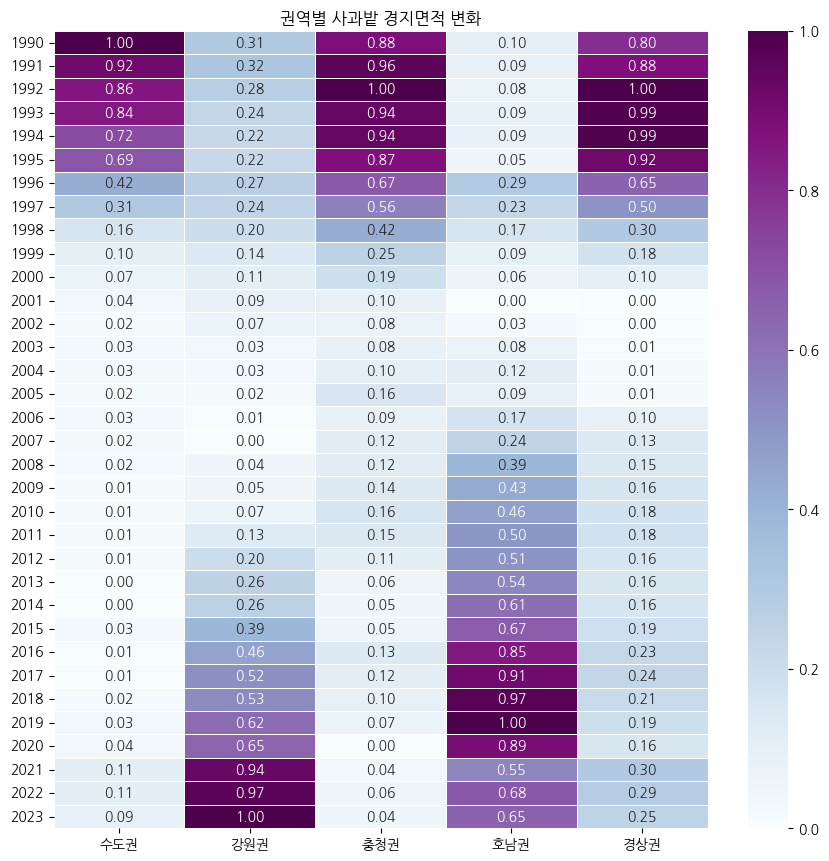

In [38]:
import seaborn as sns

plt.figure(figsize=(10,10))
heatmap = sns.heatmap(scaled_df.loc[:, '수도권':'경상권'],annot=True,fmt=".2f", linewidths=.5,cmap='BuPu')
plt.title("권역별 사과밭 경지면적 변화")
plt.autoscale() 
plt.tight_layout(pad=5)
plt.xlabel("")
plt.show()

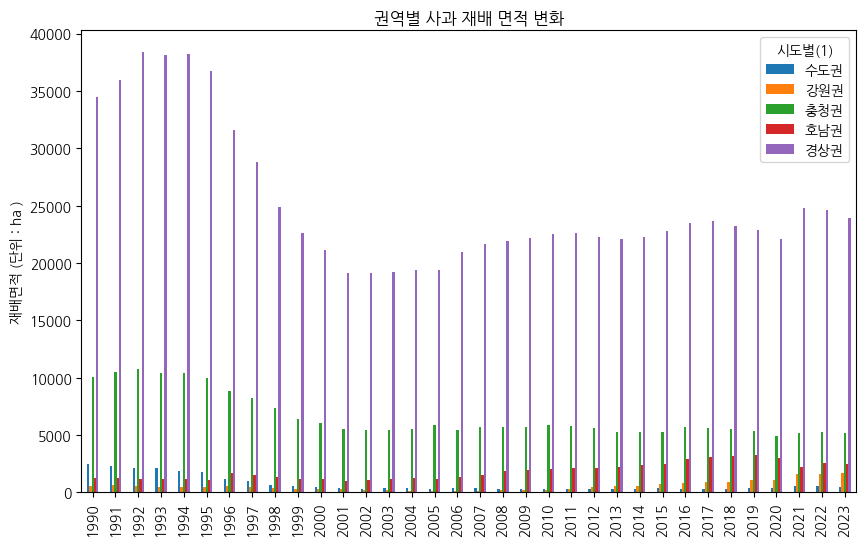

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# apple_df에서 '수도권'부터 '경상권'까지의 열을 선택
subset_df = apple_df.loc[:, '수도권':'경상권']

# 막대그래프 그리기
subset_df.plot(kind='bar', figsize=(10, 6))



# 그래프 제목과 축 레이블 설정
plt.title('권역별 사과 재배 면적 변화')
plt.xlabel('')
plt.ylabel('재배면적 (단위 : ha )')

# 그래프 표시
plt.show()

In [49]:
apple_graph = apple_df.drop(columns='계')
apple_graph.head()

시도별(1)    강원도     경기도    경상남도     경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
1990    593.0  2445.0  1369.0  32721.0    0.0  418.0  130.0    0.0    3.0   
1991    617.0  2282.0  1457.0  34099.0    0.0  426.0  115.0    0.0    0.0   
1992    552.0  2158.0  1574.0  36355.0    0.0  429.0  109.0    0.0    0.0   
1993    483.0  2126.0  1634.0  36021.0    0.0  447.0  109.0    0.0    0.0   
1994    461.0  1860.0  1832.0  35911.0    0.0  444.0   91.0    0.0    0.0   

시도별(1)  세종특별자치시  ...   전라남도   전라북도  제주도    충청남도    충청북도     수도권    강원권  \
1990        0.0  ...  270.0  959.0  0.0  4932.0  4977.0  2464.0  593.0   
1991        0.0  ...  234.0  982.0  0.0  4949.0  5433.0  2283.0  617.0   
1992        0.0  ...  237.0  945.0  0.0  5061.0  5565.0  2158.0  552.0   
1993        0.0  ...  249.0  952.0  0.0  5044.0  5232.0  2126.0  483.0   
1994        0.0  ...  236.0  966.0  0.0  5087.0  5210.0  1860.0  461.0   

시도별(1)      충청권     호남권      경상권  
1990    10039.0  1229.0  34508.0  
1991    10497.0  1216.0  35982.0  
1992    10735.0  1182.0  38358.0  
1993    10385.0  1201.0  38102.0  
1994    10388.0  1202.0  38187.0  

[5 rows x 22 columns]

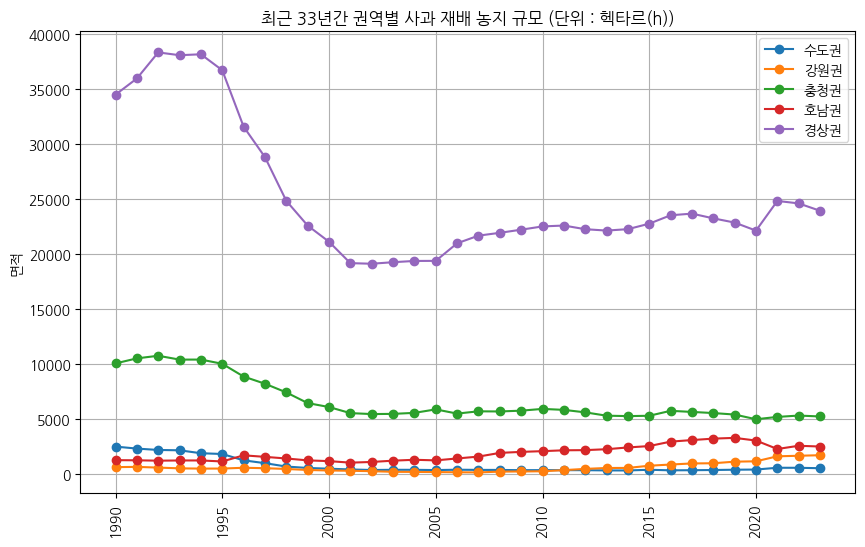

In [29]:
plt.figure(figsize=(10, 6))

for column in apple_df.columns[-5:]:
    plt.plot(apple_df.index, apple_df[column], label=column,marker='o')

plt.title('최근 33년간 권역별 사과 재배 농지 규모 (단위 : 헥타르(h))')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('면적')
plt.legend()
plt.grid(True)
plt.show()

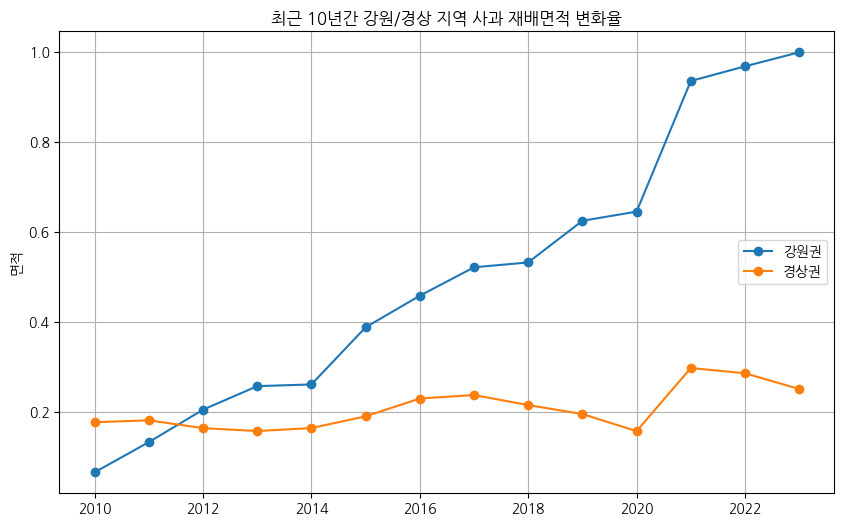

In [54]:
plt.figure(figsize=(10, 6))

decade_data = scaled_df[scaled_df.index >= 2010]

for column in decade_data.columns[-4:-3]:
    plt.plot(decade_data.index, decade_data[column], label=column,marker='o')
for column in decade_data.columns[-1:]:
    plt.plot(decade_data.index, decade_data[column], label=column,marker='o')

plt.title('최근 10년간 강원/경상 지역 사과 재배면적 변화율')
plt.xlabel('')
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

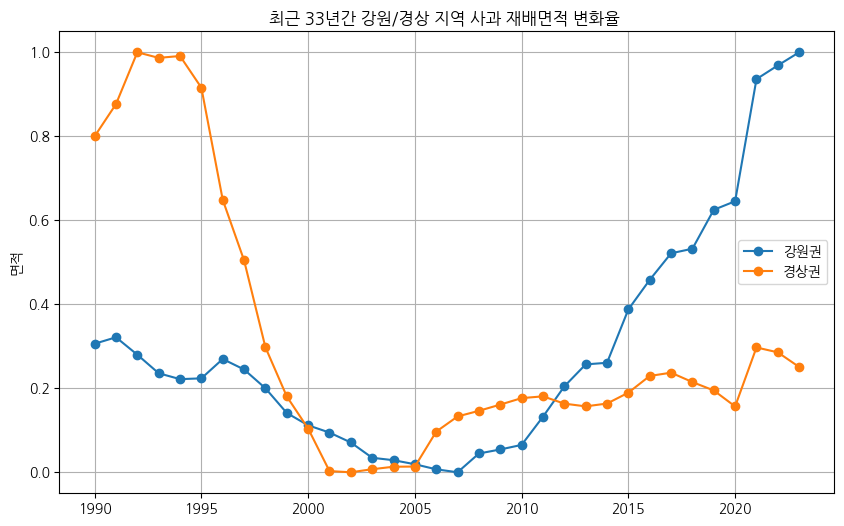

In [55]:
plt.figure(figsize=(10, 6))

for column in scaled_df.columns[-4:-3]:
    plt.plot(scaled_df.index, scaled_df[column], label=column,marker='o')
for column in scaled_df.columns[-1:]:
    plt.plot(scaled_df.index, scaled_df[column], label=column,marker='o')

plt.title('최근 33년간 강원/경상 지역 사과 재배면적 변화율 ')
plt.xlabel('')
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

In [57]:
decade_data = apple_df[apple_df.index >= 2010]

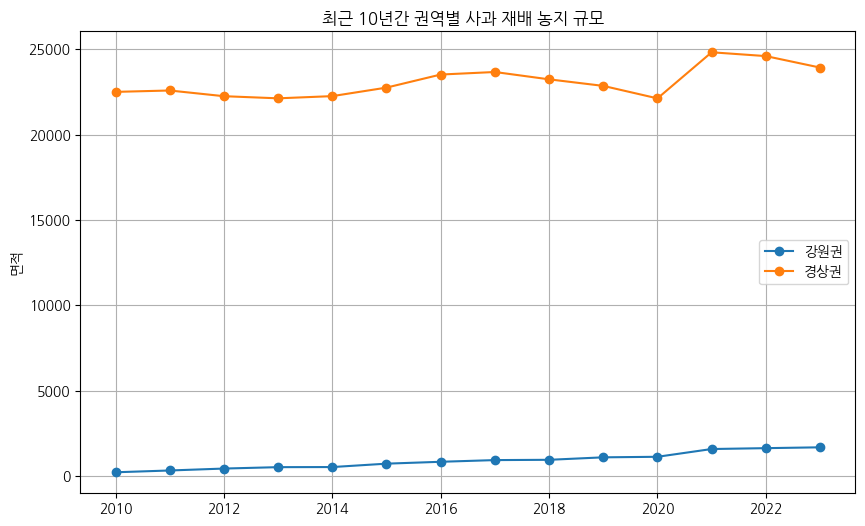

In [183]:
plt.figure(figsize=(10, 6))

for column in decade_data.columns[-4:-3]:
    plt.plot(decade_data.index, decade_data[column], label=column,marker='o')
for column in decade_data.columns[-1:]:
    plt.plot(decade_data.index, decade_data[column], label=column,marker='o')

plt.title('최근 10년간 권역별 사과 재배 농지 규모  ')
plt.xlabel('')
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

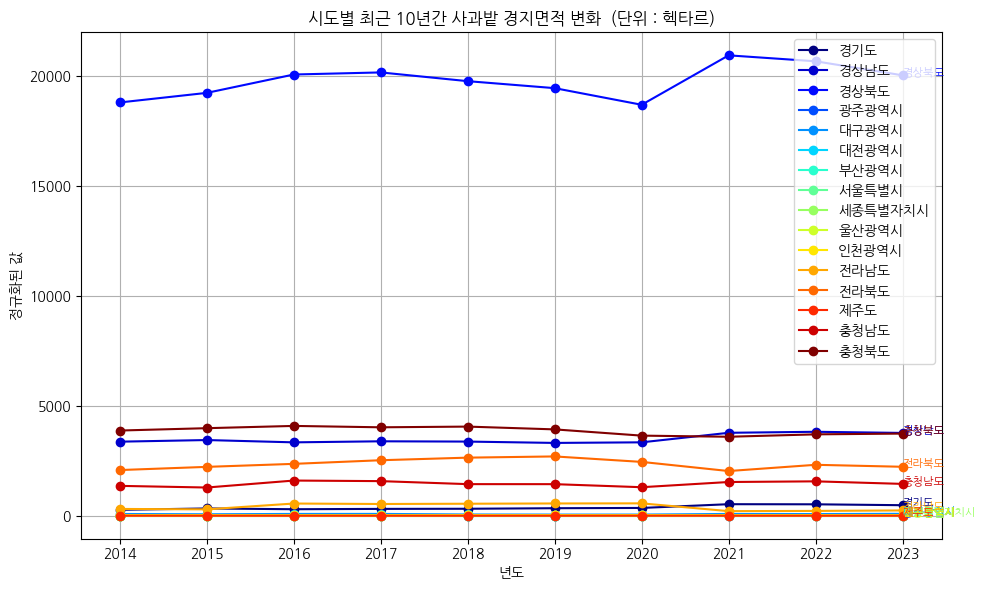

In [59]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

decade_data = apple_graph[apple_graph.index >= 2014]

plt.rc('font', family='NanumGothic')

plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(decade_data.columns)-6))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(decade_data.columns[1:-5], colors)):
    plt.plot(decade_data.index, decade_data[column], marker='o', label=column, color=color)
    plt.text(decade_data.index[-1], decade_data[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 10년간 사과밭 경지면적 변화  (단위 : 헥타르)")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(decade_data.index)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

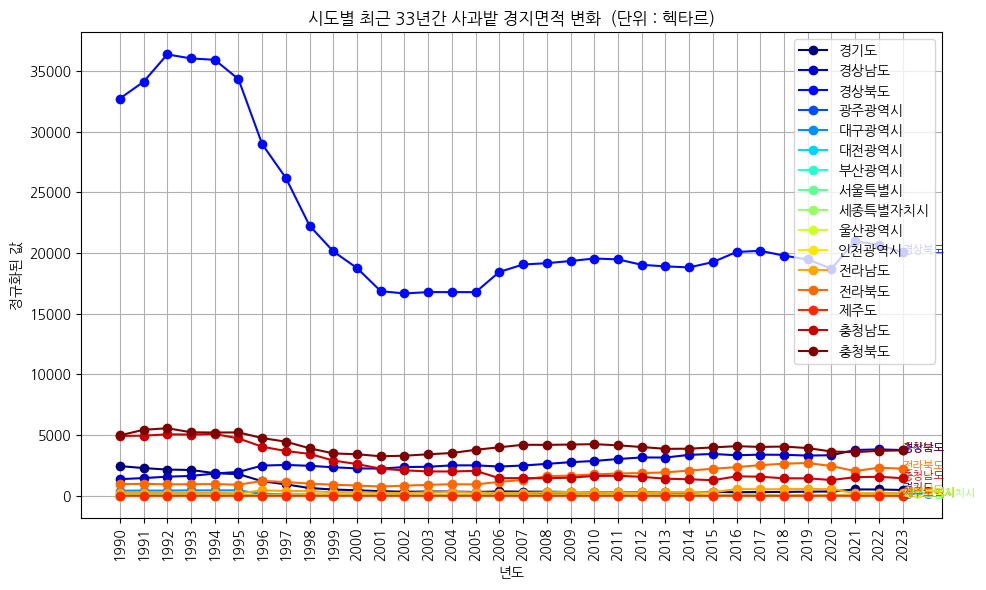

In [61]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')

plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(apple_graph.columns)-6))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(apple_graph.columns[1:-5], colors)):
    plt.plot(apple_graph.index, apple_graph[column], marker='o', label=column, color=color)
    plt.text(apple_graph.index[-1], apple_graph[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 33년간 사과밭 경지면적 변화  (단위 : 헥타르)")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(apple_graph.index,rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

### 배 경지면적 / 생산량 데이터 가공 

In [62]:
pear_idx=[]
for idx, val in enumerate(list(open_field_data.loc[0])):
    if val == '● 배':
        print(str(idx) + ' : '+ val)
        pear_idx.append(idx)
pear_idx

3 : ● 배
5 : ● 배
7 : ● 배
9 : ● 배
11 : ● 배
13 : ● 배
15 : ● 배
17 : ● 배
19 : ● 배
21 : ● 배
23 : ● 배
25 : ● 배
27 : ● 배
29 : ● 배
31 : ● 배
33 : ● 배
35 : ● 배
37 : ● 배
39 : ● 배
41 : ● 배
43 : ● 배
45 : ● 배
47 : ● 배
49 : ● 배
51 : ● 배
53 : ● 배
55 : ● 배
57 : ● 배
59 : ● 배
61 : ● 배
63 : ● 배
65 : ● 배
67 : ● 배
69 : ● 배


[3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69]

In [63]:
import numpy as np
pear_df = open_field_data.iloc[:,pear_idx]
pear_df.set_index(open_field_data.iloc[:,0],inplace=True)
pear_df = pear_df.applymap(lambda x: np.nan if x == '-' else x).apply(pd.to_numeric, errors='coerce').fillna(0)
pear_df.columns = [col.replace('.1', '') for col in pear_df.columns]
pear_df = pear_df.pivot_table(index=None, columns='시도별(1)', aggfunc='sum')
pear_df.drop(columns=['시도별(1)'],inplace=True)
pear_df.head()

C:\Users\hyeji\AppData\Local\Temp\ipykernel_16684\3541548524.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pear_df = pear_df.applymap(lambda x: np.nan if x == '-' else x).apply(pd.to_numeric, errors='coerce').fillna(0)


시도별(1)    강원도     경기도    경상남도    경상북도        계  광주광역시  대구광역시  대전광역시  부산광역시  \
1990    192.0  2557.0  1437.0   662.0   9058.0   85.0    0.0  228.0   35.0   
1991    237.0  2497.0  1474.0   713.0   9495.0   85.0    2.0  235.0   27.0   
1992    269.0  2625.0  1479.0   952.0  10339.0   86.0    0.0  252.0   12.0   
1993    282.0  2616.0  1493.0  1291.0  11009.0   26.0    0.0  305.0   12.0   
1994    261.0  2788.0  1586.0  1637.0  12649.0   16.0    0.0  326.0    9.0   

시도별(1)  서울특별시  세종특별자치시  울산광역시  인천광역시    전라남도   전라북도  제주도    충청남도   충청북도  
1990     58.0      0.0    0.0   11.0  1657.0  366.0  0.0  1482.0  288.0  
1991     79.0      0.0    0.0   10.0  1868.0  381.0  0.0  1561.0  326.0  
1992     85.0      0.0    0.0   12.0  2110.0  490.0  0.0  1620.0  347.0  
1993     68.0      0.0    0.0   10.0  2245.0  507.0  0.0  1730.0  424.0  
1994     45.0      0.0    0.0   14.0  2650.0  618.0  0.0  2172.0  527.0

In [64]:
pear_index = pear_df.index.astype(int)
pear_index

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int32')

In [65]:
pear_df.set_index(pear_index,inplace=True)

In [66]:
pear_df['수도권'] = pear_df['서울특별시'] + pear_df['경기도'] + pear_df['인천광역시']
pear_df['강원권'] = pear_df['강원도']
pear_df['충청권'] = pear_df['대전광역시'] + pear_df['세종특별자치시'] + pear_df['충청남도'] + pear_df['충청북도']
pear_df['호남권'] = pear_df['광주광역시'] + pear_df['전라남도'] + pear_df['전라북도'] 
pear_df['경상권'] = pear_df['경상남도'] + pear_df['경상북도'] + pear_df['대구광역시'] + pear_df['울산광역시']+ pear_df['부산광역시']

In [67]:
pear_df.head()

시도별(1)    강원도     경기도    경상남도    경상북도        계  광주광역시  대구광역시  대전광역시  부산광역시  \
1990    192.0  2557.0  1437.0   662.0   9058.0   85.0    0.0  228.0   35.0   
1991    237.0  2497.0  1474.0   713.0   9495.0   85.0    2.0  235.0   27.0   
1992    269.0  2625.0  1479.0   952.0  10339.0   86.0    0.0  252.0   12.0   
1993    282.0  2616.0  1493.0  1291.0  11009.0   26.0    0.0  305.0   12.0   
1994    261.0  2788.0  1586.0  1637.0  12649.0   16.0    0.0  326.0    9.0   

시도별(1)  서울특별시  ...    전라남도   전라북도  제주도    충청남도   충청북도     수도권    강원권     충청권  \
1990     58.0  ...  1657.0  366.0  0.0  1482.0  288.0  2626.0  192.0  1998.0   
1991     79.0  ...  1868.0  381.0  0.0  1561.0  326.0  2586.0  237.0  2122.0   
1992     85.0  ...  2110.0  490.0  0.0  1620.0  347.0  2722.0  269.0  2219.0   
1993     68.0  ...  2245.0  507.0  0.0  1730.0  424.0  2694.0  282.0  2459.0   
1994     45.0  ...  2650.0  618.0  0.0  2172.0  527.0  2847.0  261.0  3025.0   

시도별(1)     호남권     경상권  
1990    2108.0  2134.0  
1991    2334.0  2216.0  
1992    2686.0  2443.0  
1993    2778.0  2796.0  
1994    3284.0  3232.0  

[5 rows x 23 columns]

In [68]:
pear_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1990 to 2023
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   강원도      34 non-null     float64
 1   경기도      34 non-null     float64
 2   경상남도     34 non-null     float64
 3   경상북도     34 non-null     float64
 4   계        34 non-null     float64
 5   광주광역시    34 non-null     float64
 6   대구광역시    34 non-null     float64
 7   대전광역시    34 non-null     float64
 8   부산광역시    34 non-null     float64
 9   서울특별시    34 non-null     float64
 10  세종특별자치시  34 non-null     float64
 11  울산광역시    34 non-null     float64
 12  인천광역시    34 non-null     float64
 13  전라남도     34 non-null     float64
 14  전라북도     34 non-null     float64
 15  제주도      34 non-null     float64
 16  충청남도     34 non-null     float64
 17  충청북도     34 non-null     float64
 18  수도권      34 non-null     float64
 19  강원권      34 non-null     float64
 20  충청권      34 non-null     float64
 21  호남권      34 non-nu

In [25]:
pear_df.to_csv('../project_data/pear_df.csv',sep=',',encoding='utf-8')

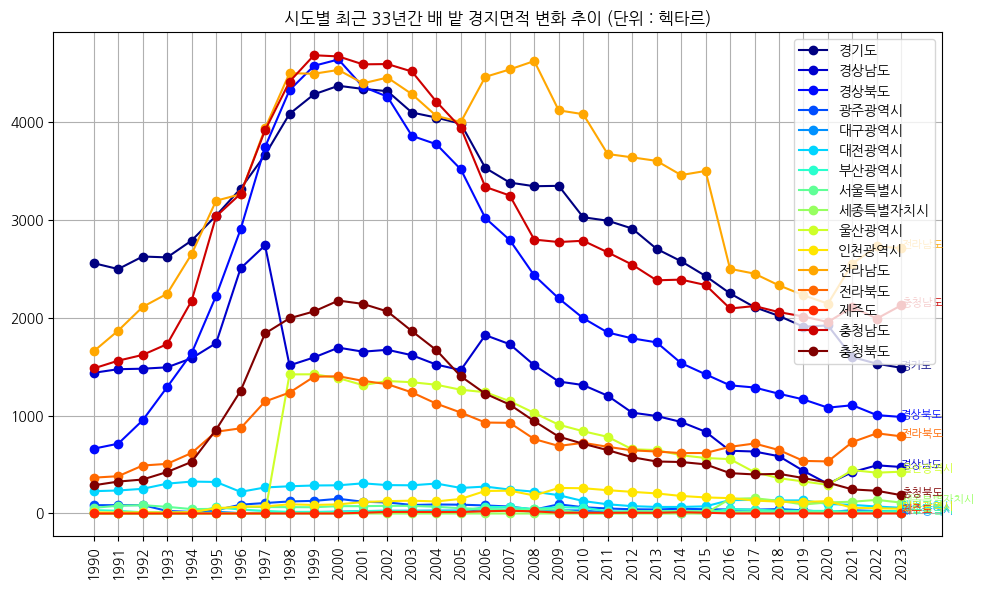

In [70]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')

except_total_pear = pear_df.drop(columns=['계'])
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(except_total_pear.columns)-6))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(except_total_pear.columns[1:-5], colors)):
    plt.plot(except_total_pear.index, except_total_pear[column], marker='o', label=column, color=color)
    plt.text(except_total_pear.index[-1], except_total_pear[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 33년간 배 밭 경지면적 변화 추이 (단위 : 헥타르)")
plt.xlabel("")
plt.ylabel("")
plt.xticks(except_total_pear.index,rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

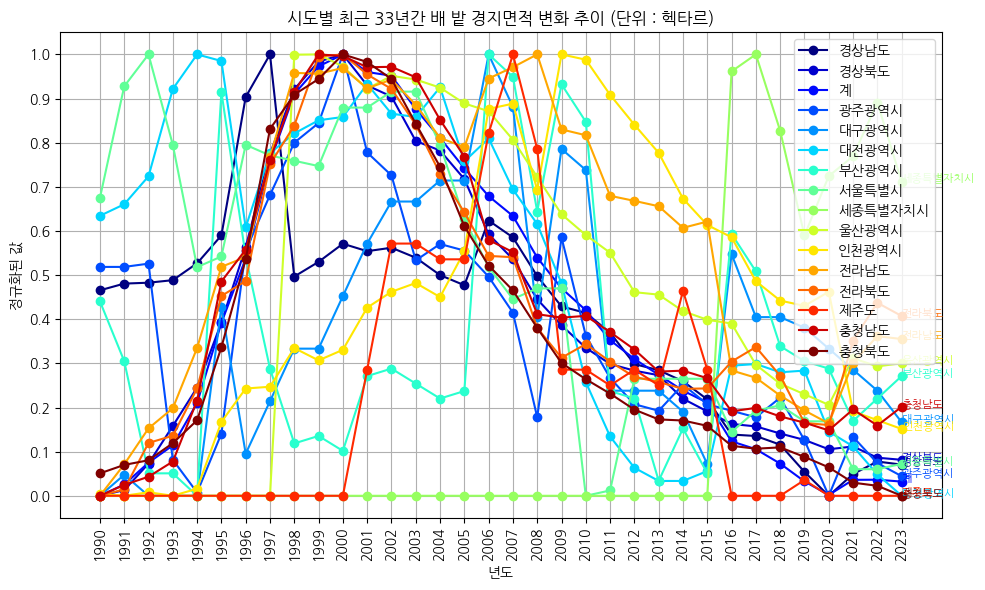

In [199]:
plt.rc('font', family='NanumGothic')

# 열 데이터 정규화
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(pear_df.iloc[:, 1:]), columns=pear_df.columns[1:])
scaled_df.index = pear_df.index

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(scaled_df.columns)-6))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(scaled_df.columns[1:-5], colors)):
    plt.plot(scaled_df.index, scaled_df[column], marker='o', label=column, color=color)
    plt.text(scaled_df.index[-1], scaled_df[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 33년간 배 밭 경지면적 변화 추이 (단위 : 헥타르)")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(scaled_df.index,rotation=90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

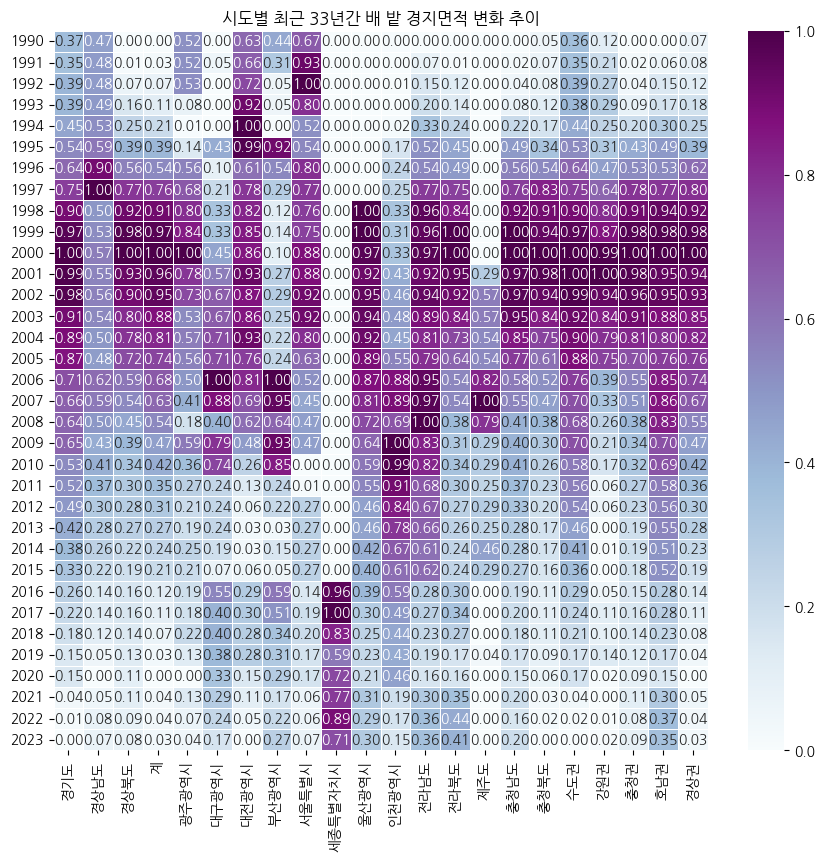

In [201]:
import seaborn as sns

plt.figure(figsize=(10,10))
heatmap = sns.heatmap(scaled_df[:],annot=True,fmt=".2f", linewidths=.5,cmap='BuPu')
plt.title("시도별 최근 33년간 배 밭 경지면적 변화 추이")
plt.autoscale() 
plt.tight_layout(pad=5)
plt.xlabel("")
plt.show()

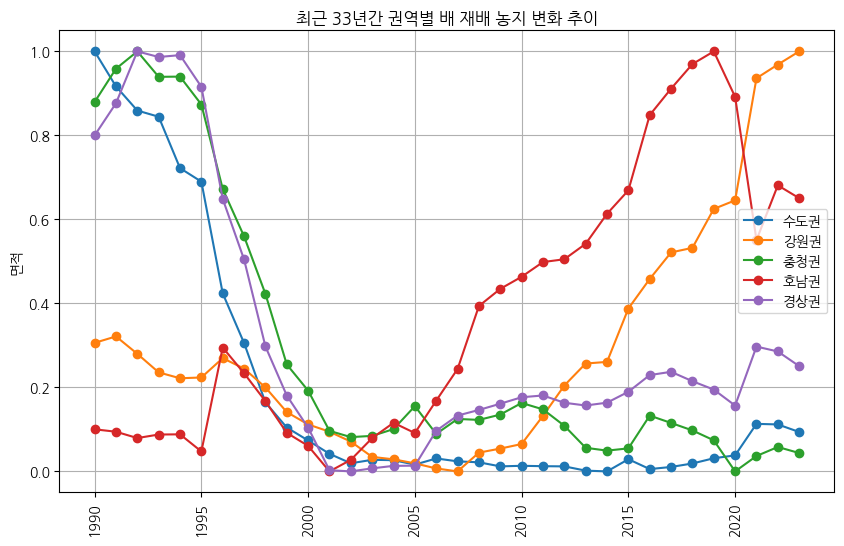

In [78]:
plt.figure(figsize=(10, 6))

for column in scaled_df.columns[-5:]:
    plt.plot(scaled_df.index, scaled_df[column], label=column,marker='o')

plt.title('최근 33년간 권역별 배 재배 농지 변화 추이')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

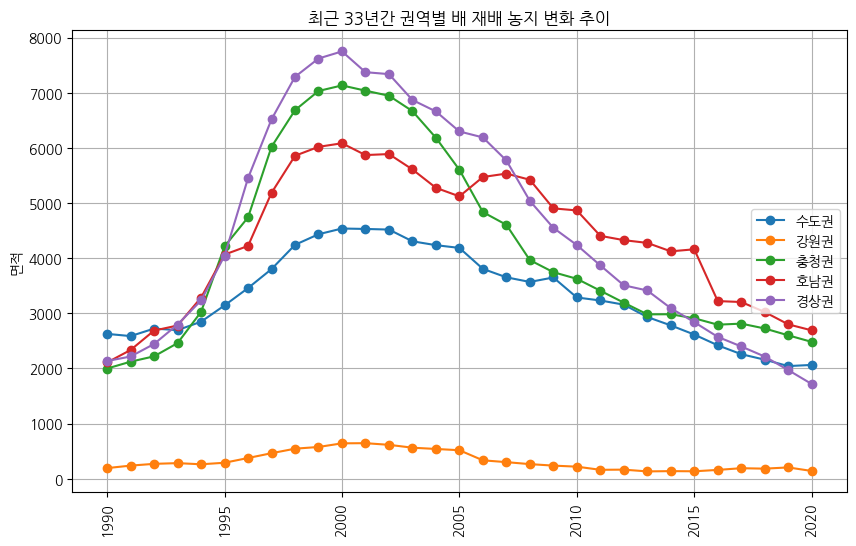

In [80]:
plt.figure(figsize=(10, 6))

for column in except_total_pear.columns[-5:]:
    plt.plot(except_total_pear.index[:-3], except_total_pear[column][:-3], label=column,marker='o')

plt.title('최근 33년간 권역별 배 재배 농지 변화 추이')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

배는 딱히 재배지역 북상에 대한 유의미한 결과는 없다. 
전국에서 면적 감소중인건 ㅇㅈ

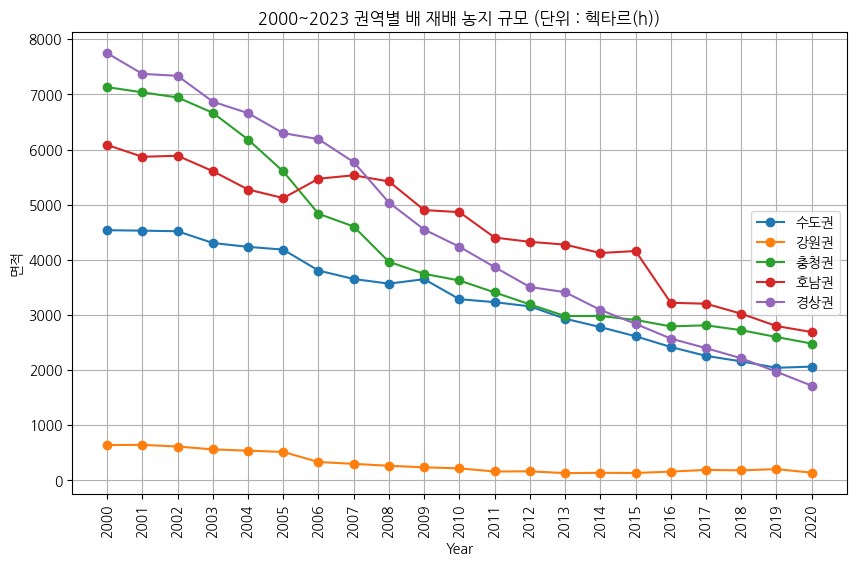

In [87]:
decade_data = pear_df[pear_df.index >= 2000]
plt.figure(figsize=(10, 6))

for column in decade_data.columns[-5:]:
    plt.plot(range(len(decade_data.index[:-3])), decade_data[column][:-3], label=column, marker='o')

plt.xticks(range(len(decade_data.index[:-3])), decade_data.index[:-3])

plt.title('2000~2023 권역별 배 재배 농지 규모 (단위 : 헥타르(h))')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

### 채소 재배 면적 변화 (양파)

In [2]:
import pandas as pd
import mysql.connector 
conn = mysql.connector.connect(
 host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com",
 port = 3306,
 user = "hyun",
 password = "0774",
 database ="AutoFarming"
)
cursor = conn.cursor(buffered=True)
veji_area_rate = pd.read_sql("SELECT * FROM openfield_vege",conn)
conn.close()

C:\Users\hyeji\AppData\Local\Temp\ipykernel_3520\807905844.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  veji_area_rate = pd.read_sql("SELECT * FROM openfield_vege",conn)


In [3]:
veji_area_rate.head()

시도별(1) year1990 year1991 year1992 year1993 year1994 year1995 year1996  \
0  시도별(1)       양파       양파       양파       양파       양파       양파       양파   
1       계     7602    10288    14066     9716     9674    15817     9661   
2   서울특별시        0        0        0        0        0        2        0   
3   부산광역시       96      118      127       31       23       30        3   
4   대구광역시       21        0        2        1        0      216      118   

  year1997 year1998  ... year2014 year2015 year2016 year2017 year2018  \
0       양파       양파  ...       양파       양파       양파       양파       양파   
1    12539    14806  ...    23911    18015    19896    19538    26425   
2        0        0  ...        -        0        0        0        0   
3       19       10  ...       16       17       21       10       31   
4      100      106  ...      120       63      217      236      263   

  year2019 year2020 year2021 year2022 year2023  
0       양파       양파       양파       양파       양파  
1    21777    14673    18461    17661    17282  
2        0        0        1        1        1  
3       16       13       26       19       16  
4      311      356      332      360      332  

[5 rows x 35 columns]

In [4]:
import re

def remove_year(column_name):
    return re.sub('year', '', column_name)

new_columns = [remove_year(column) for column in veji_area_rate.columns]
veji_area_rate.columns = new_columns
veji_area_rate.head()

시도별(1)  1990   1991   1992  1993  1994   1995  1996   1997   1998  ...  \
0  시도별(1)    양파     양파     양파    양파    양파     양파    양파     양파     양파  ...   
1       계  7602  10288  14066  9716  9674  15817  9661  12539  14806  ...   
2   서울특별시     0      0      0     0     0      2     0      0      0  ...   
3   부산광역시    96    118    127    31    23     30     3     19     10  ...   
4   대구광역시    21      0      2     1     0    216   118    100    106  ...   

    2014   2015   2016   2017   2018   2019   2020   2021   2022   2023  
0     양파     양파     양파     양파     양파     양파     양파     양파     양파     양파  
1  23911  18015  19896  19538  26425  21777  14673  18461  17661  17282  
2      -      0      0      0      0      0      0      1      1      1  
3     16     17     21     10     31     16     13     26     19     16  
4    120     63    217    236    263    311    356    332    360    332  

[5 rows x 35 columns]

In [5]:
onion_idx=[]
for idx, val in enumerate(list(veji_area_rate.loc[0])):
    if val == '양파':
        print(str(idx) + ' : '+ val)
        onion_idx.append(idx)
onion_idx

1 : 양파
2 : 양파
3 : 양파
4 : 양파
5 : 양파
6 : 양파
7 : 양파
8 : 양파
9 : 양파
10 : 양파
11 : 양파
12 : 양파
13 : 양파
14 : 양파
15 : 양파
16 : 양파
17 : 양파
18 : 양파
19 : 양파
20 : 양파
21 : 양파
22 : 양파
23 : 양파
24 : 양파
25 : 양파
26 : 양파
27 : 양파
28 : 양파
29 : 양파
30 : 양파
31 : 양파
32 : 양파
33 : 양파
34 : 양파


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [6]:
import numpy as np
onion_df = veji_area_rate.iloc[:,onion_idx]
onion_df.set_index(veji_area_rate.iloc[:,0],inplace=True)
onion_df = onion_df.applymap(lambda x: np.nan if x == '-' else x).apply(pd.to_numeric, errors='coerce').fillna(0)
onion_df.columns = [col.replace('.12', '') for col in onion_df.columns]
onion_df.head()


C:\Users\hyeji\AppData\Local\Temp\ipykernel_3520\816277012.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  onion_df = onion_df.applymap(lambda x: np.nan if x == '-' else x).apply(pd.to_numeric, errors='coerce').fillna(0)


1990     1991     1992    1993    1994     1995    1996     1997  \
시도별(1)                                                                       
시도별(1)     0.0      0.0      0.0     0.0     0.0      0.0     0.0      0.0   
계       7602.0  10288.0  14066.0  9716.0  9674.0  15817.0  9661.0  12539.0   
서울특별시      0.0      0.0      0.0     0.0     0.0      2.0     0.0      0.0   
부산광역시     96.0    118.0    127.0    31.0    23.0     30.0     3.0     19.0   
대구광역시     21.0      0.0      2.0     1.0     0.0    216.0   118.0    100.0   

           1998     1999  ...     2014     2015     2016     2017     2018  \
시도별(1)                    ...                                                
시도별(1)      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
계       14806.0  16131.0  ...  23911.0  18015.0  19896.0  19538.0  26425.0   
서울특별시       0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
부산광역시      10.0      6.0  ...     16.0     17.0     21.0     10.0     31.0   
대구광역시     106.0     99.0  ...    120.0     63.0    217.0    236.0    263.0   

           2019     2020     2021     2022     2023  
시도별(1)                                               
시도별(1)      0.0      0.0      0.0      0.0      0.0  
계       21777.0  14673.0  18461.0  17661.0  17282.0  
서울특별시       0.0      0.0      1.0      1.0      1.0  
부산광역시      16.0     13.0     26.0     19.0     16.0  
대구광역시     311.0    356.0    332.0    360.0    332.0  

[5 rows x 34 columns]

In [7]:
onion_df.columns = [col.replace('.13', '') for col in onion_df.columns]

In [8]:
onion_df = onion_df.pivot_table(index=None, columns='시도별(1)', aggfunc='sum')
onion_df.drop(columns=['시도별(1)'],inplace=True)
onion_df.head()

시도별(1)  강원도  경기도    경상남도    경상북도        계  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
1990    1.0  0.0  1838.0  1839.0   7602.0    0.0   21.0    0.0   96.0    0.0   
1991    3.0  1.0  2524.0  2259.0  10288.0    0.0    0.0    0.0  118.0    0.0   
1992    5.0  5.0  3334.0  3246.0  14066.0    3.0    2.0    0.0  127.0    0.0   
1993    1.0  1.0  2290.0  2039.0   9716.0    0.0    1.0    0.0   31.0    0.0   
1994    3.0  2.0  2370.0  1825.0   9674.0    1.0    0.0    0.0   23.0    0.0   

시도별(1)  세종특별자치시  울산광역시  인천광역시    전라남도   전라북도    제주도   충청남도  충청북도  
1990        0.0    0.0    0.0  3364.0  120.0  238.0   85.0   0.0  
1991        0.0    0.0    0.0  4481.0  298.0  455.0  149.0   0.0  
1992        0.0    0.0    0.0  5977.0  373.0  725.0  268.0   1.0  
1993        0.0    0.0    1.0  4667.0  203.0  355.0  127.0   0.0  
1994        0.0    0.0    0.0  4635.0  214.0  455.0  146.0   0.0

In [9]:
new_index = onion_df.index.astype(int)
onion_df.set_index(new_index,inplace=True)

In [10]:
onion_df['수도권'] = onion_df['서울특별시'] + onion_df['경기도'] + onion_df['인천광역시']
onion_df['강원권'] = onion_df['강원도']
onion_df['충청권'] = onion_df['대전광역시'] + onion_df['세종특별자치시'] + onion_df['충청남도'] + onion_df['충청북도']
onion_df['호남권'] = onion_df['광주광역시'] + onion_df['전라남도'] + onion_df['전라북도'] 
onion_df['경상권'] = onion_df['경상남도'] + onion_df['경상북도'] + onion_df['대구광역시'] + onion_df['울산광역시']+ onion_df['부산광역시']

In [11]:
onion_df.head()

시도별(1)  강원도  경기도    경상남도    경상북도        계  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
1990    1.0  0.0  1838.0  1839.0   7602.0    0.0   21.0    0.0   96.0    0.0   
1991    3.0  1.0  2524.0  2259.0  10288.0    0.0    0.0    0.0  118.0    0.0   
1992    5.0  5.0  3334.0  3246.0  14066.0    3.0    2.0    0.0  127.0    0.0   
1993    1.0  1.0  2290.0  2039.0   9716.0    0.0    1.0    0.0   31.0    0.0   
1994    3.0  2.0  2370.0  1825.0   9674.0    1.0    0.0    0.0   23.0    0.0   

시도별(1)  ...    전라남도   전라북도    제주도   충청남도  충청북도  수도권  강원권    충청권     호남권  \
1990    ...  3364.0  120.0  238.0   85.0   0.0  0.0  1.0   85.0  3484.0   
1991    ...  4481.0  298.0  455.0  149.0   0.0  1.0  3.0  149.0  4779.0   
1992    ...  5977.0  373.0  725.0  268.0   1.0  5.0  5.0  269.0  6353.0   
1993    ...  4667.0  203.0  355.0  127.0   0.0  2.0  1.0  127.0  4870.0   
1994    ...  4635.0  214.0  455.0  146.0   0.0  2.0  3.0  146.0  4850.0   

시도별(1)     경상권  
1990    3794.0  
1991    4901.0  
1992    6709.0  
1993    4361.0  
1994    4218.0  

[5 rows x 23 columns]

In [33]:
onion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1990 to 2023
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   강원도      34 non-null     float64
 1   경기도      34 non-null     float64
 2   경상남도     34 non-null     float64
 3   경상북도     34 non-null     float64
 4   계        34 non-null     float64
 5   광주광역시    34 non-null     float64
 6   대구광역시    34 non-null     float64
 7   대전광역시    34 non-null     float64
 8   부산광역시    34 non-null     float64
 9   서울특별시    34 non-null     float64
 10  세종특별자치시  34 non-null     float64
 11  울산광역시    34 non-null     float64
 12  인천광역시    34 non-null     float64
 13  전라남도     34 non-null     float64
 14  전라북도     34 non-null     float64
 15  제주도      34 non-null     float64
 16  충청남도     34 non-null     float64
 17  충청북도     34 non-null     float64
 18  수도권      34 non-null     float64
 19  강원권      34 non-null     float64
 20  충청권      34 non-null     float64
 21  호남권      34 non-nu

In [34]:
onion_df.to_csv('../project_data/onion_df.csv',sep=',',encoding='utf-8')

권역별로 나누지 않고 양파 그래프 그려보기 

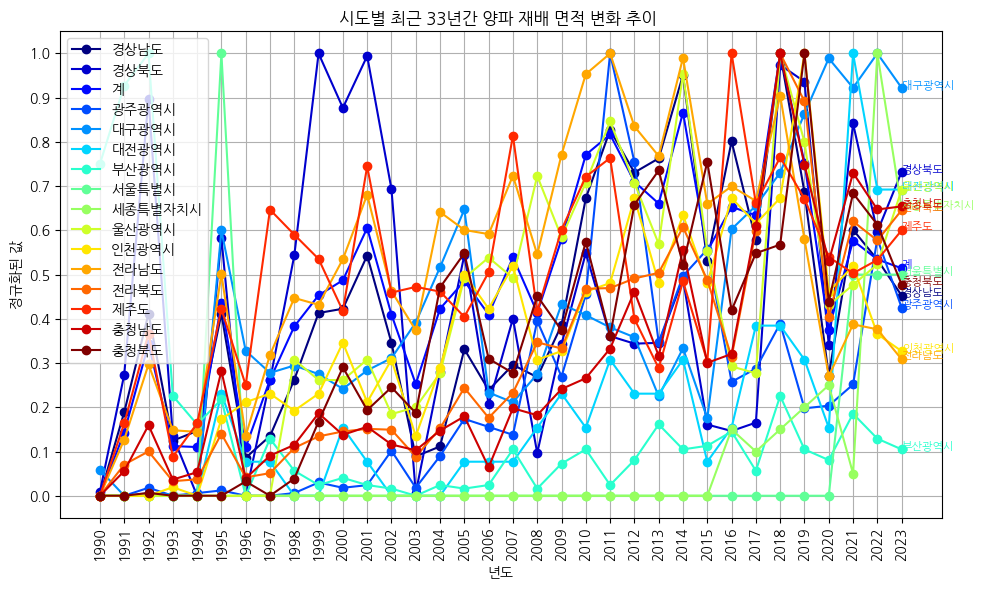

In [12]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')

# 열 데이터 정규화
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(onion_df.iloc[:, 1:]), columns=onion_df.columns[1:])
scaled_df.index = onion_df.index

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(scaled_df.columns)-6))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(scaled_df.columns[1:-5], colors)):
    plt.plot(scaled_df.index, scaled_df[column], marker='o', label=column, color=color)
    plt.text(scaled_df.index[-1], scaled_df[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 33년간 양파 재배 면적 변화 추이 ")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(scaled_df.index,rotation=90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

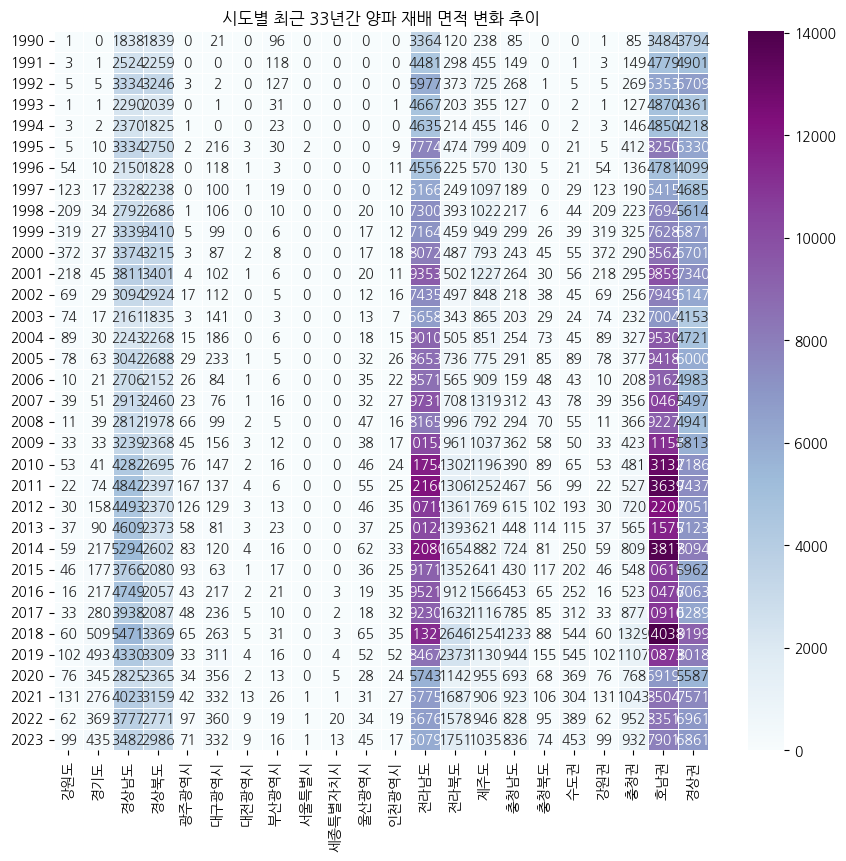

In [13]:
import seaborn as sns
except_total_onion = onion_df.drop(columns=['계'])
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(except_total_onion,annot=True,fmt=".0f", linewidths=.5,cmap='BuPu')
plt.title("시도별 최근 33년간 양파 재배 면적 변화 추이")
plt.autoscale() 
plt.tight_layout(pad=5)
plt.xlabel("")
plt.show()

정규화 X 값 그대로 그려보기 

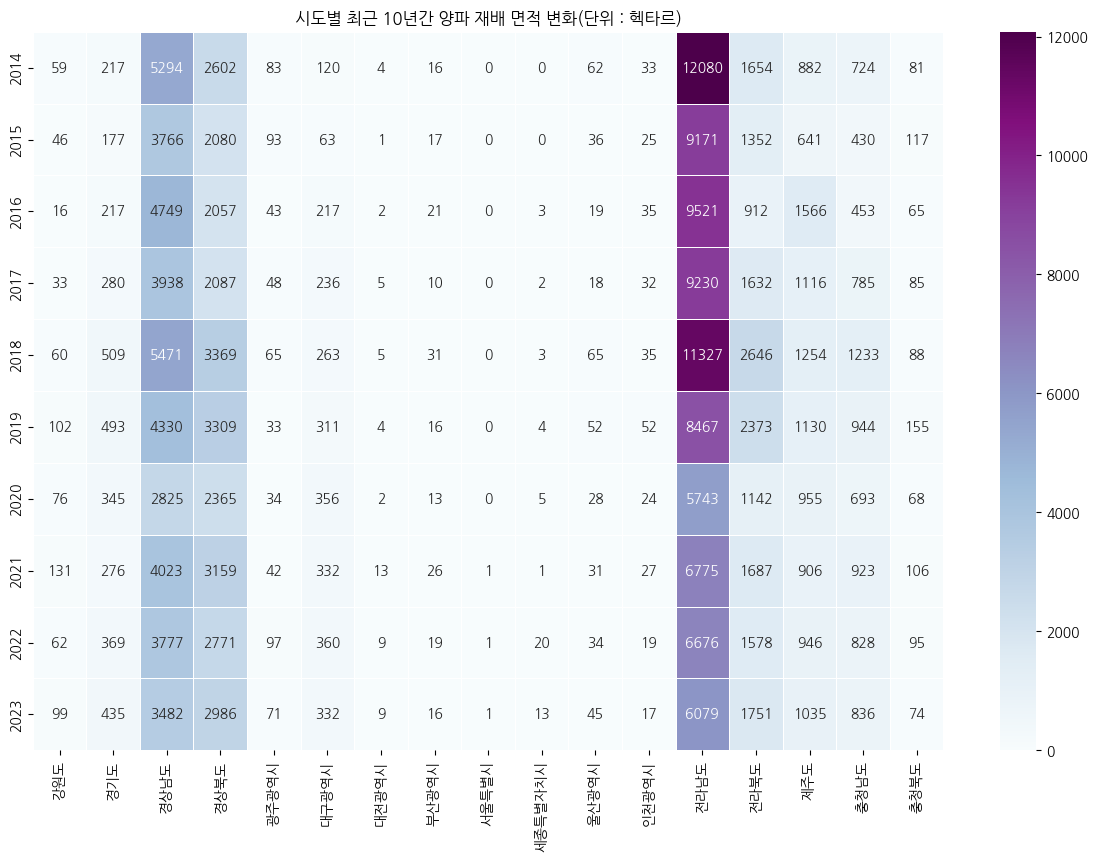

In [17]:
import seaborn as sns

except_total_onion = onion_df.drop(columns=['계'])

plt.figure(figsize=(13,10))
heatmap = sns.heatmap(except_total_onion,annot=True,fmt=".0f", linewidths=.5,cmap='BuPu')
plt.title("시도별 최근 10년간 양파 재배 면적 변화(단위 : 헥타르)")
plt.autoscale() 
plt.tight_layout(pad=5)
plt.xlabel("")
plt.show()

In [18]:
onion_df['수도권'] = onion_df['서울특별시'] + onion_df['경기도'] + onion_df['인천광역시']
onion_df['강원권'] = onion_df['강원도']
onion_df['충청권'] = onion_df['대전광역시'] + onion_df['세종특별자치시'] + onion_df['충청남도'] + onion_df['충청북도']
onion_df['호남권'] = onion_df['광주광역시'] + onion_df['전라남도'] + onion_df['전라북도'] 
onion_df['경상권'] = onion_df['경상남도'] + onion_df['경상북도'] + onion_df['대구광역시'] + onion_df['울산광역시']+ onion_df['부산광역시']

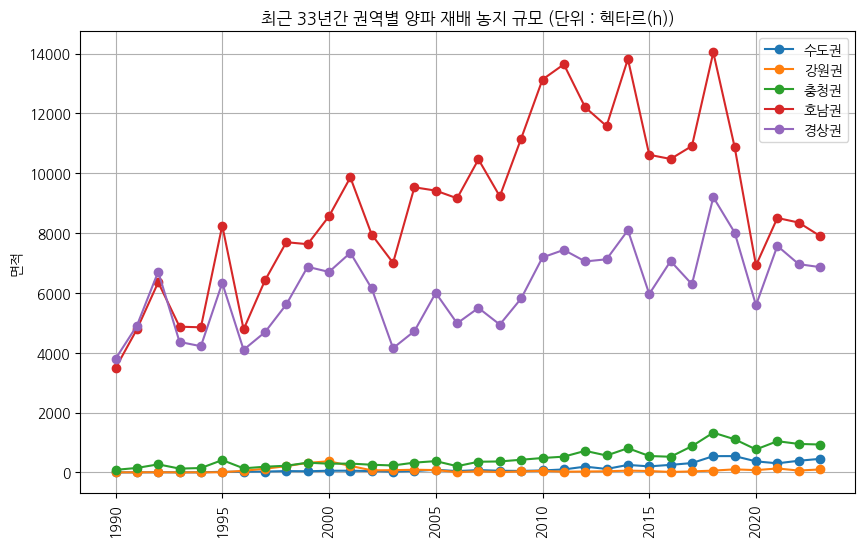

In [236]:
plt.figure(figsize=(10, 6))

for column in onion_df.columns[-5:]:
    plt.plot(onion_df.index, onion_df[column], label=column,marker='o')

plt.title('최근 33년간 권역별 양파 재배 농지 규모 (단위 : 헥타르(h))')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('면적')
plt.legend()
plt.grid(True)
plt.show()

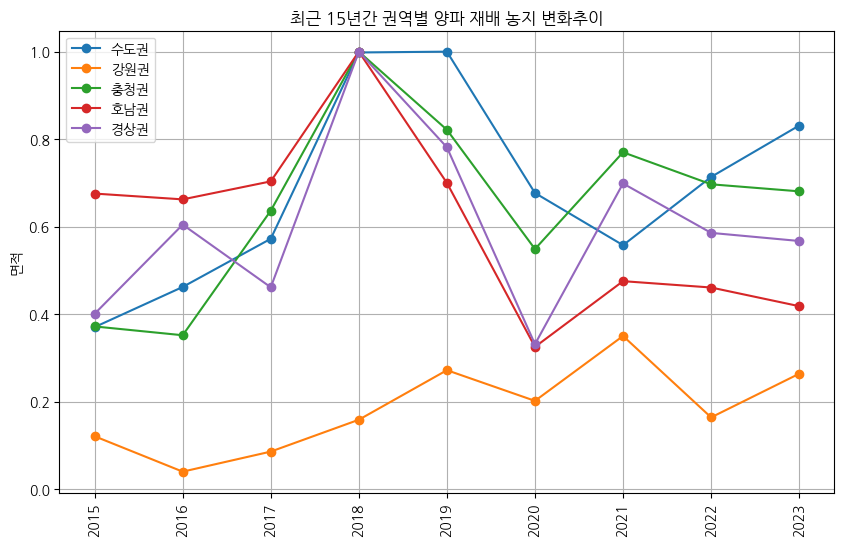

In [246]:
plt.figure(figsize=(10, 6))

decade_data = scaled_df[onion_df.index >= 2015]

for column in decade_data.columns[-5:]:
    plt.plot(decade_data.index, decade_data[column], label=column,marker='o')

plt.title('최근 15년간 권역별 양파 재배 농지 변화추이')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('면적')
plt.legend()
plt.grid(True)
plt.show()

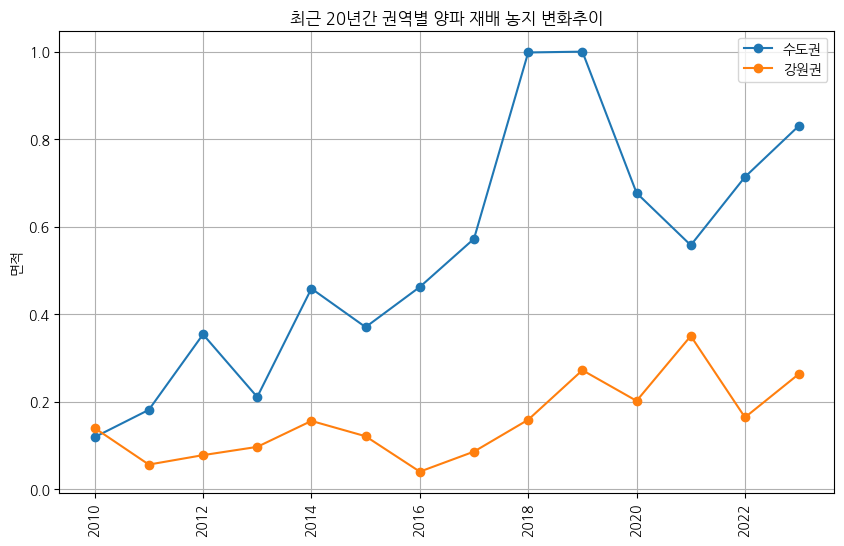

In [245]:
plt.figure(figsize=(10, 6))

decade_data = scaled_df[onion_df.index >= 2010]

for column in decade_data.columns[-5:-3]:
    plt.plot(decade_data.index, decade_data[column], label=column,marker='o')

plt.title('최근 20년간 권역별 양파 재배 농지 변화추이')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('면적')
plt.legend()
plt.grid(True)
plt.show()

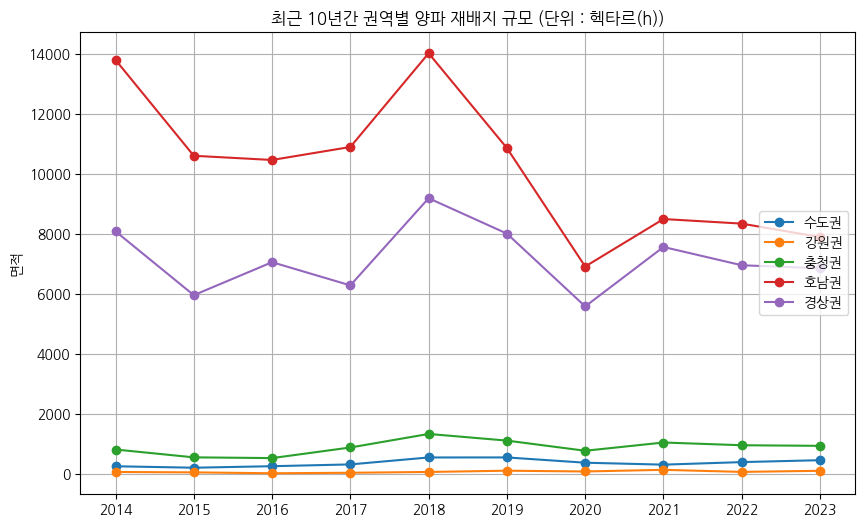

In [19]:
plt.figure(figsize=(10, 6))

for column in onion_df.columns[-5:]:
    plt.plot(onion_df.index, onion_df[column], label=column,marker='o')

plt.title('최근 10년간 권역별 양파 재배지 규모 (단위 : 헥타르(h))')
plt.xlabel('')
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

오호라 전라도/경상도 (남부지방)은 급락 ,
수도권 / 강원권은 미미하지만 증가추세 같은데 ? 
확대해보자 

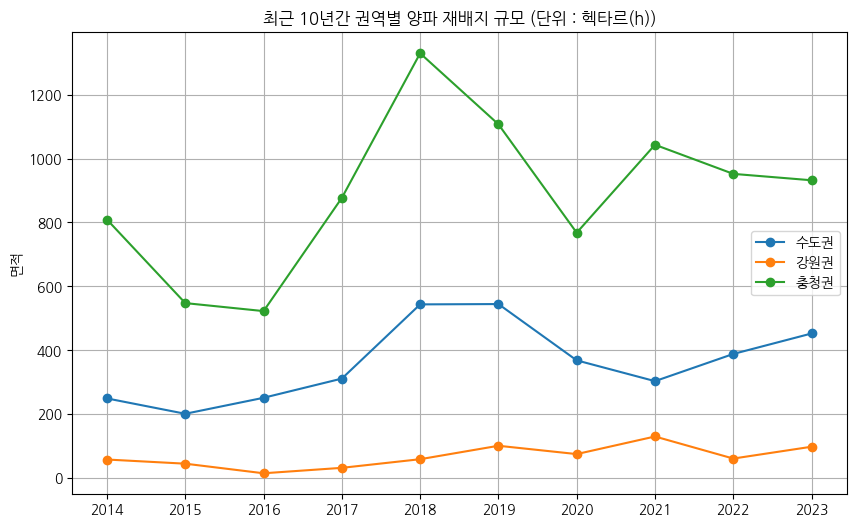

In [20]:
plt.figure(figsize=(10, 6))

for column in onion_df.columns[-5:-2]:
    plt.plot(onion_df.index, onion_df[column], label=column,marker='o')

plt.title('최근 10년간 권역별 양파 재배지 규모 (단위 : 헥타르(h))')
plt.xlabel('')
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

## 우리나라 농지 면적 변화를 알아보자 

In [2]:
import pandas as pd
Area_by_region = pd.read_csv("../project_data/전국_도별__논밭별_경지면적.csv")
Area_by_region.head()

시도별(1) 전답별(1)     2014     2015     2016     2017     2018     2019  \
0     전국      계  1691113  1679023  1643599  1620796  1595614  1580957   
1     전국      논   933615   908194   895739   864865   844265   829778   
2     전국      밭   757498   770829   747860   755931   751349   751179   
3  서울특별시      계      480      476      422      402      353      347   
4  서울특별시      논      179      176      176      167      159      150   

      2020     2021     2022     2023  
0  1564797  1546717  1528237  1512145  
1   823895   780440   775640   763989  
2   740902   766277   752597   748156  
3      343      619      613      607  
4      145      196      190      200

In [36]:
Area_by_region['구분'] = Area_by_region['시도별(1)'] + '-' + Area_by_region['전답별(1)']
Area_by_region['구분']

0          전국-계
1          전국-논
2          전국-밭
3       서울특별시-계
4       서울특별시-논
5       서울특별시-밭
6       부산광역시-계
7       부산광역시-논
8       부산광역시-밭
9       대구광역시-계
10      대구광역시-논
11      대구광역시-밭
12      인천광역시-계
13      인천광역시-논
14      인천광역시-밭
15      광주광역시-계
16      광주광역시-논
17      광주광역시-밭
18      대전광역시-계
19      대전광역시-논
20      대전광역시-밭
21      울산광역시-계
22      울산광역시-논
23      울산광역시-밭
24    세종특별자치시-계
25    세종특별자치시-논
26    세종특별자치시-밭
27        경기도-계
28        경기도-논
29        경기도-밭
30        강원도-계
31        강원도-논
32        강원도-밭
33       충청북도-계
34       충청북도-논
35       충청북도-밭
36       충청남도-계
37       충청남도-논
38       충청남도-밭
39       전라북도-계
40       전라북도-논
41       전라북도-밭
42       전라남도-계
43       전라남도-논
44       전라남도-밭
45       경상북도-계
46       경상북도-논
47       경상북도-밭
48       경상남도-계
49       경상남도-논
50       경상남도-밭
51        제주도-계
52        제주도-논
53        제주도-밭
Name: 구분, dtype: object

In [37]:
# '-계'로 끝나는 모든 데이터 찾기
filtered_df = Area_by_region[Area_by_region['구분'].str.endswith('-계')]

print(filtered_df)


     시도별(1) 전답별(1)     2014     2015     2016     2017     2018     2019  \
0        전국      계  1691113  1679023  1643599  1620796  1595614  1580957   
3     서울특별시      계      480      476      422      402      353      347   
6     부산광역시      계     6351     6008     5934     5742     5578     5408   
9     대구광역시      계     8660     8291     8102     8062     7661     7472   
12    인천광역시      계    20098    20114    19511    19004    18377    18244   
15    광주광역시      계    10370    10261     9878     9446     9328     9252   
18    대전광역시      계     4385     4305     4072     3888     3794     3742   
21    울산광역시      계    11369    11003    10889    10540    10064     9977   
24  세종특별자치시      계     8444     8260     8102     7958     7704     7588   
27      경기도      계   176028   175417   169435   165707   162587   160181   
30      강원도      계   108727   107277   104330   103133   101564   100756   
33     충청북도      계   112097   111568   109161   107097   102870   101900   
36     충청남도 

In [38]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 51
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별(1)  18 non-null     object
 1   전답별(1)  18 non-null     object
 2   2014    18 non-null     int64 
 3   2015    18 non-null     int64 
 4   2016    18 non-null     int64 
 5   2017    18 non-null     int64 
 6   2018    18 non-null     int64 
 7   2019    18 non-null     int64 
 8   2020    18 non-null     int64 
 9   2021    18 non-null     int64 
 10  2022    18 non-null     int64 
 11  2023    18 non-null     int64 
 12  구분      18 non-null     object
dtypes: int64(10), object(3)
memory usage: 2.0+ KB


In [39]:
filtered_df.drop(columns=['전답별(1)','구분'],inplace=True)
filtered_df.head()

/tmp/ipykernel_22829/1201205909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['전답별(1)','구분'],inplace=True)


시도별(1)     2014     2015     2016     2017     2018     2019     2020  \
0      전국  1691113  1679023  1643599  1620796  1595614  1580957  1564797   
3   서울특별시      480      476      422      402      353      347      343   
6   부산광역시     6351     6008     5934     5742     5578     5408     5306   
9   대구광역시     8660     8291     8102     8062     7661     7472     7458   
12  인천광역시    20098    20114    19511    19004    18377    18244    18083   

       2021     2022     2023  
0   1546717  1528237  1512145  
3       619      613      607  
6      5042     4832     4797  
9      7038     6917     6821  
12    17620    17499    17343

In [40]:
filtered_df.rename(columns={'시도별(1)': '시도'}, inplace=True)
filtered_df.set_index('시도',inplace=True)
filtered_df.head()

/tmp/ipykernel_22829/2685624467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'시도별(1)': '시도'}, inplace=True)


2014     2015     2016     2017     2018     2019     2020     2021  \
시도                                                                              
전국     1691113  1679023  1643599  1620796  1595614  1580957  1564797  1546717   
서울특별시      480      476      422      402      353      347      343      619   
부산광역시     6351     6008     5934     5742     5578     5408     5306     5042   
대구광역시     8660     8291     8102     8062     7661     7472     7458     7038   
인천광역시    20098    20114    19511    19004    18377    18244    18083    17620   

          2022     2023  
시도                       
전국     1528237  1512145  
서울특별시      613      607  
부산광역시     4832     4797  
대구광역시     6917     6821  
인천광역시    17499    17343

In [41]:
# pivot_table()을 사용하여 행과 열을 반전
flipped_df = filtered_df.pivot_table(index=None, columns='시도', aggfunc='sum')

flipped_df.head()

시도       강원도     경기도    경상남도    경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
2014  108727  176028  154050  277650  10370   8660   4385   6351    480   
2015  107277  175417  151769  274487  10261   8291   4305   6008    476   
2016  104330  169435  149247  268461   9878   8102   4072   5934    422   
2017  103133  165707  146766  265665   9446   8062   3888   5742    402   
2018  101564  162587  144404  262049   9328   7661   3794   5578    353   

시도    세종특별자치시  울산광역시  인천광역시       전국    전라남도    전라북도    제주도    충청남도    충청북도  
2014     8444  11369  20098  1691113  305889  204612  62686  219215  112097  
2015     8260  11003  20114  1679023  304799  203559  62642  218787  111568  
2016     8102  10889  19511  1643599  298095  200720  62140  215100  109161  
2017     7958  10540  19004  1620796  293863  199196  61088  213238  107097  
2018     7704  10064  18377  1595614  290827  197541  59338  211577  102870

In [42]:
flipped_df.head()

시도       강원도     경기도    경상남도    경상북도  광주광역시  대구광역시  대전광역시  부산광역시  서울특별시  \
2014  108727  176028  154050  277650  10370   8660   4385   6351    480   
2015  107277  175417  151769  274487  10261   8291   4305   6008    476   
2016  104330  169435  149247  268461   9878   8102   4072   5934    422   
2017  103133  165707  146766  265665   9446   8062   3888   5742    402   
2018  101564  162587  144404  262049   9328   7661   3794   5578    353   

시도    세종특별자치시  울산광역시  인천광역시       전국    전라남도    전라북도    제주도    충청남도    충청북도  
2014     8444  11369  20098  1691113  305889  204612  62686  219215  112097  
2015     8260  11003  20114  1679023  304799  203559  62642  218787  111568  
2016     8102  10889  19511  1643599  298095  200720  62140  215100  109161  
2017     7958  10540  19004  1620796  293863  199196  61088  213238  107097  
2018     7704  10064  18377  1595614  290827  197541  59338  211577  102870

In [43]:
flipped_df['수도권'] = flipped_df['서울특별시'] + flipped_df['경기도'] + flipped_df['인천광역시']
flipped_df['강원권'] = flipped_df['강원도']
flipped_df['충청권'] = flipped_df['대전광역시'] + flipped_df['세종특별자치시'] + flipped_df['충청남도'] + flipped_df['충청북도']
flipped_df['호남권'] = flipped_df['광주광역시'] + flipped_df['전라남도'] + flipped_df['전라북도'] 
flipped_df['경상권'] = flipped_df['경상남도'] + flipped_df['경상북도'] + flipped_df['대구광역시'] + flipped_df['울산광역시']+ flipped_df['부산광역시']

In [45]:
flipped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2014 to 2023
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   강원도      10 non-null     int64
 1   경기도      10 non-null     int64
 2   경상남도     10 non-null     int64
 3   경상북도     10 non-null     int64
 4   광주광역시    10 non-null     int64
 5   대구광역시    10 non-null     int64
 6   대전광역시    10 non-null     int64
 7   부산광역시    10 non-null     int64
 8   서울특별시    10 non-null     int64
 9   세종특별자치시  10 non-null     int64
 10  울산광역시    10 non-null     int64
 11  인천광역시    10 non-null     int64
 12  전국       10 non-null     int64
 13  전라남도     10 non-null     int64
 14  전라북도     10 non-null     int64
 15  제주도      10 non-null     int64
 16  충청남도     10 non-null     int64
 17  충청북도     10 non-null     int64
 18  수도권      10 non-null     int64
 19  강원권      10 non-null     int64
 20  충청권      10 non-null     int64
 21  호남권      10 non-null     int64
 22  경상권      10 non-null     int

In [46]:
flipped_df.to_csv('../project_data/yield.csv',sep=',',encoding='utf-8')

정규화 x 면적 비교

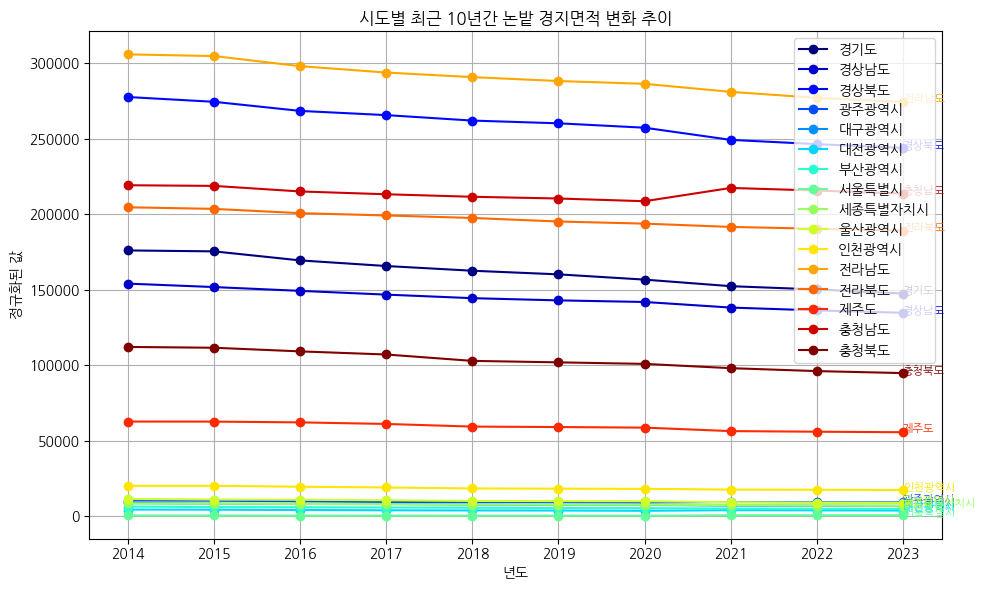

In [33]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')

#전국 삭제
scale_or_area=flipped_df.drop(columns=['전국'])

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(scale_or_area.columns)-1))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(scale_or_area.columns[1:], colors)):
    plt.plot(scale_or_area.index, scale_or_area[column], marker='o', label=column, color=color)
    plt.text(scale_or_area.index[-1], scale_or_area[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 10년간 논밭 경지면적 변화 추이")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(scale_or_area.index)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

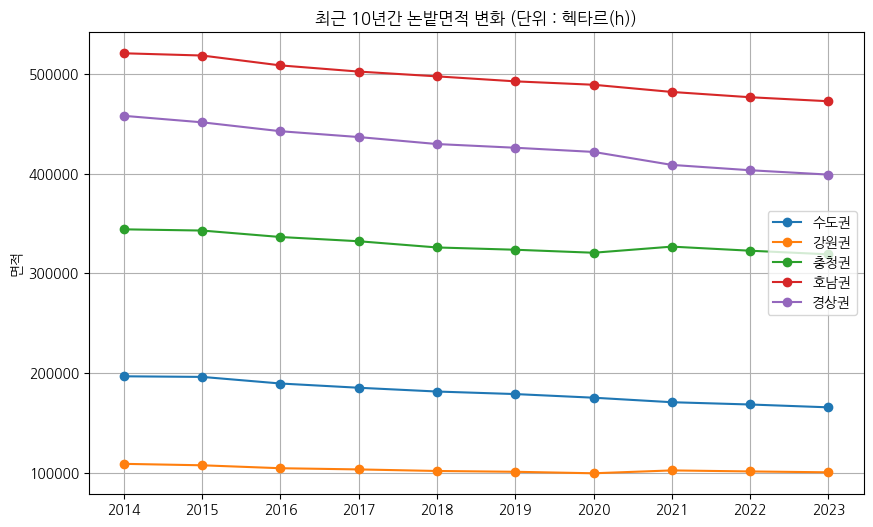

In [35]:
plt.figure(figsize=(10, 6))

scale_or_area=flipped_df.drop(columns=['전국'])

for column in scale_or_area.columns[-5:]:
    plt.plot(scale_or_area.index, scale_or_area[column], label=column,marker='o')

plt.title('최근 10년간 논밭면적 변화 (단위 : 헥타르(h))')
plt.xlabel('')
plt.ylabel('면적')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

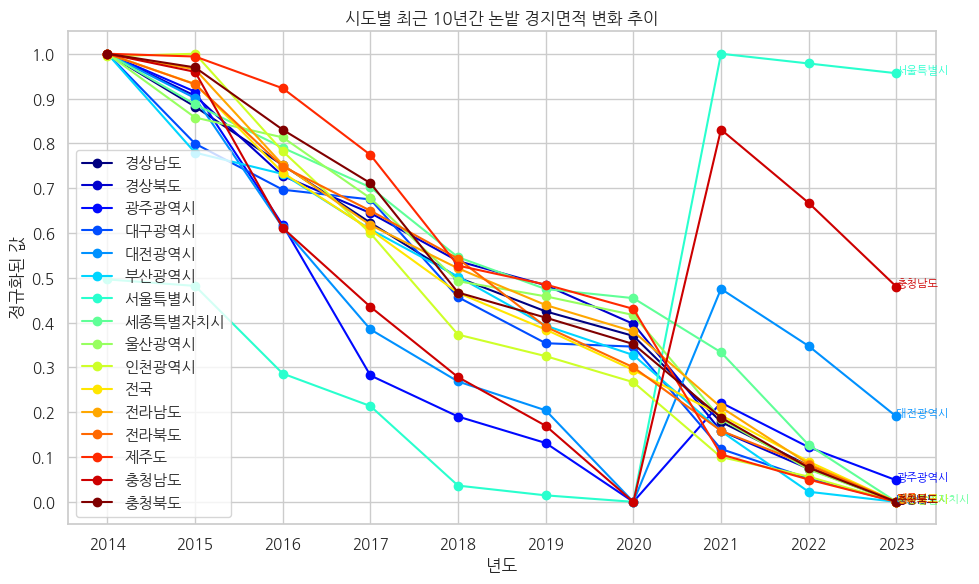

In [64]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')

# 열 데이터 정규화
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(flipped_df.iloc[:, 1:]), columns=flipped_df.columns[1:])
scaled_df.index = flipped_df.index

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(scaled_df.columns)-1))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(scaled_df.columns[1:], colors)):
    plt.plot(scaled_df.index, scaled_df[column], marker='o', label=column, color=color)
    plt.text(scaled_df.index[-1], scaled_df[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 10년간 논밭 경지면적 변화 추이")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(scaled_df.index)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

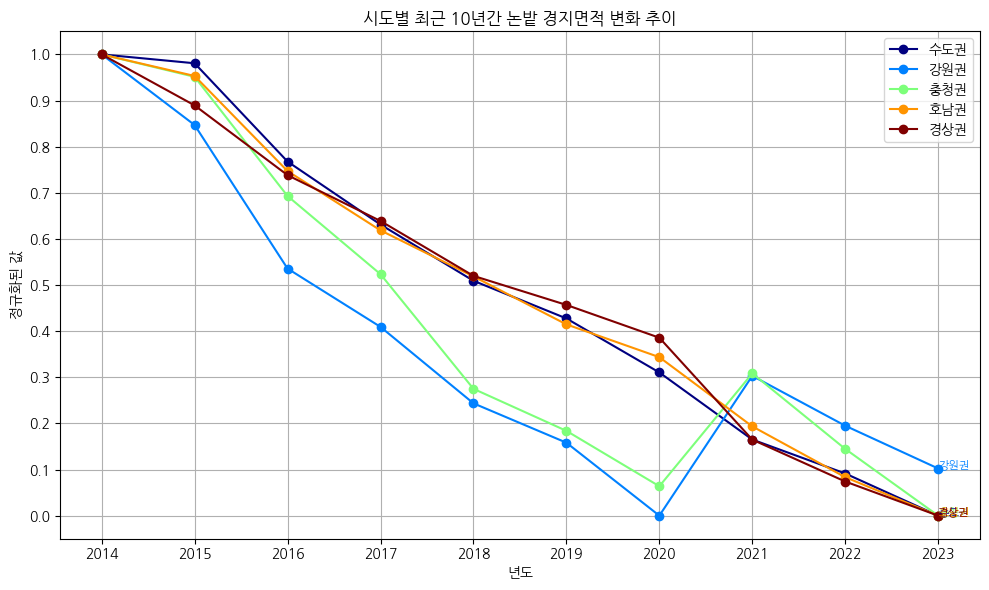

In [36]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')

# 열 데이터 정규화
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(flipped_df.iloc[:, 1:]), columns=flipped_df.columns[1:])
scaled_df.index = flipped_df.index

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, 5))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(scaled_df.columns[-5:], colors)):
    plt.plot(scaled_df.index, scaled_df[column], marker='o', label=column, color=color)
    plt.text(scaled_df.index[-1], scaled_df[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 10년간 논밭 경지면적 변화 추이")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(scaled_df.index)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

히트맵 ㄱ

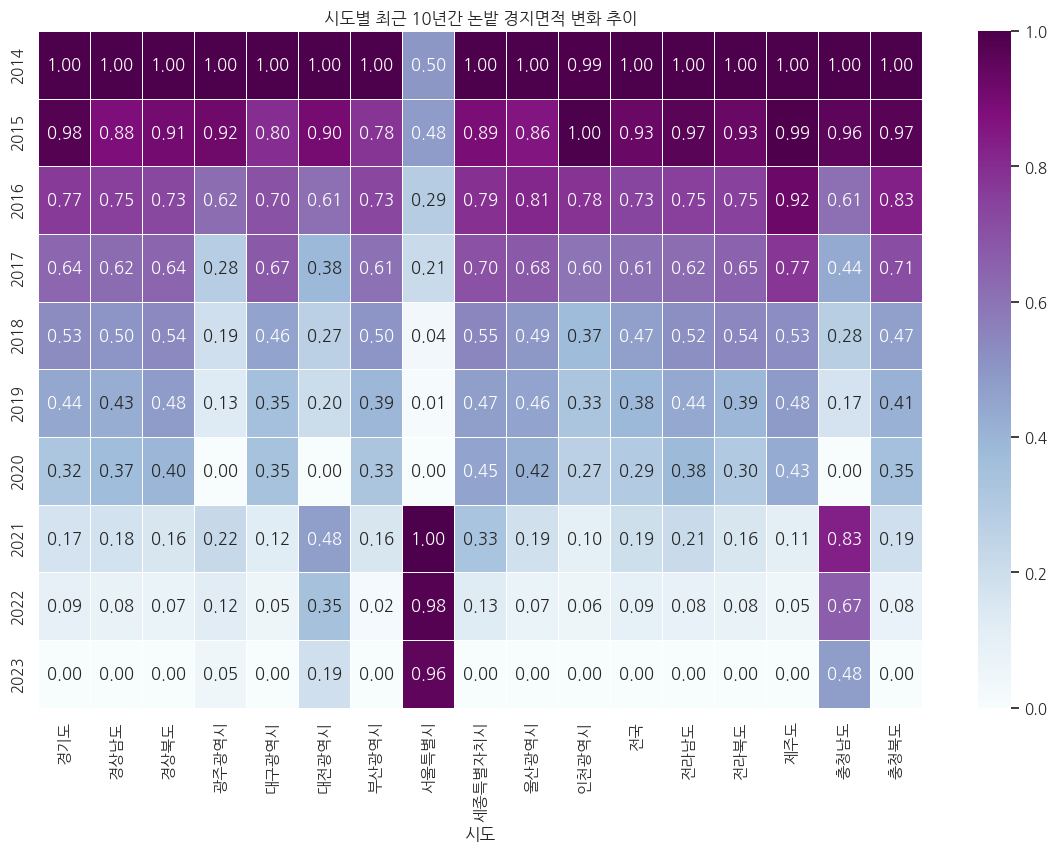

In [67]:
import seaborn as sns

plt.figure(figsize=(13,10))
heatmap = sns.heatmap(scaled_df,annot=True,fmt=".2f", linewidths=.5,cmap='BuPu')
plt.title("시도별 최근 10년간 논밭 경지면적 변화 추이")
plt.autoscale() 
plt.tight_layout(pad=5)
plt.show()

밭 Field ~ 

### 오호라 너네 서울/충남/대전 수상해 ~

### 기후 변화에 따른 재배지역 변화 

#### 사과

### a : are아르 100제곱미터
### ha : hectare헥타르 10000제곱미터

In [3]:
import mysql.connector 
conn = mysql.connector.connect(
 host = "database-1.cdv9nppqt3kw.ap-northeast-2.rds.amazonaws.com",
 port = 3306,
 user = "hyun",
 password = "0774",
 database ="AutoFarming"
)
cursor = conn.cursor(buffered=True)
apple_yield = pd.read_sql("SELECT * FROM apple_yield",conn)
conn.close()

C:\Users\hyeji\AppData\Local\Temp\ipykernel_9676\347965831.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  apple_yield = pd.read_sql("SELECT * FROM apple_yield",conn)


In [4]:
ton_idx = []
for idx, val in enumerate(list(apple_yield.loc[0])):
    if val == '사과:생산량 (톤)':
        print(str(idx) + ' : '+ val)
        ton_idx.append(idx)
ton_idx

3 : 사과:생산량 (톤)
6 : 사과:생산량 (톤)
9 : 사과:생산량 (톤)
12 : 사과:생산량 (톤)
15 : 사과:생산량 (톤)
18 : 사과:생산량 (톤)
21 : 사과:생산량 (톤)
24 : 사과:생산량 (톤)
27 : 사과:생산량 (톤)
30 : 사과:생산량 (톤)
33 : 사과:생산량 (톤)
36 : 사과:생산량 (톤)
39 : 사과:생산량 (톤)
42 : 사과:생산량 (톤)
45 : 사과:생산량 (톤)
48 : 사과:생산량 (톤)
51 : 사과:생산량 (톤)
54 : 사과:생산량 (톤)


[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54]

In [49]:
ton_df = apple_yield.iloc[:,ton_idx]
ton_df

계.2     서울특별시.2     부산광역시.2     대구광역시.2     인천광역시.2     광주광역시.2  \
0   사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)   
1       474712           0          25        1262           0           0   
2       582845           0          27        1548           0           0   
3       576369           0          89        1627          81           0   
4       545349           0          13        1322          21           0   
5       475303           0          15         509          50          21   
6       535324           0          55         378          87          35   
7       422115           0          28         647          63          20   
8       515931           0          45         752          46          25   
9       566041           0          49         990          19          31   
10      394428           0         108         641          52          15   

       대전광역시.2     울산광역시.2   세종특별자치시.2       경기도.2       강원도.2      충청북도.2  \
0   사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)   
1           70          51           -        2272        2225       56667   
2           51          80           -        2740        4472       69242   
3          322         342           0        2234        5778       69846   
4          199         327          19        1762        5550       66661   
5          153         167         157         992        5506       51580   
6           90          19         198        1699       10486       52376   
7           11          61           0        1563        8215       42477   
8          164         170          40        3001       23503       52133   
9          200         420          24        3333       24852       58640   
10         112         284          12        2779       19729       36063   

        충청남도.2      전라북도.2      전라남도.2      경상북도.2      경상남도.2       제주도.2  
0   사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  사과:생산량 (톤)  
1        23427       28598        5058      292340       62716           0  
2        24560       34688        5320      372627       67491           0  
3        26924       41008        9274      367710       51134           0  
4        29343       40694        7621      338034       53782           1  
5        17878       28597        3984      315230       50461           1  
6        24189       40020        5471      338085       62136           0  
7        17147       22804        2944      277942       48194           0  
8        22717       35142        1635      309034       67524           0  
9        24371       42618        2351      330532       77610           1  
10       14093       26183        1080      244990       48286           1

In [50]:
import numpy as np
ton_df.set_index(apple_yield.iloc[:,0],inplace=True)
ton_df = ton_df.applymap(lambda x: np.nan if x == '-' else x).apply(pd.to_numeric, errors='coerce').fillna(0)
ton_df.columns = [col.replace('.2', '') for col in ton_df.columns]
ton_df.head()

/tmp/ipykernel_22829/2907471866.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ton_df = ton_df.applymap(lambda x: np.nan if x == '-' else x).apply(pd.to_numeric, errors='coerce').fillna(0)


계  서울특별시  부산광역시   대구광역시  인천광역시  광주광역시  대전광역시  울산광역시  세종특별자치시  \
시점                                                                          
시점         0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0      0.0   
2014  474712.0    0.0   25.0  1262.0    0.0    0.0   70.0   51.0      0.0   
2015  582845.0    0.0   27.0  1548.0    0.0    0.0   51.0   80.0      0.0   
2016  576369.0    0.0   89.0  1627.0   81.0    0.0  322.0  342.0      0.0   
2017  545349.0    0.0   13.0  1322.0   21.0    0.0  199.0  327.0     19.0   

         경기도     강원도     충청북도     충청남도     전라북도    전라남도      경상북도     경상남도  \
시점                                                                           
시점       0.0     0.0      0.0      0.0      0.0     0.0       0.0      0.0   
2014  2272.0  2225.0  56667.0  23427.0  28598.0  5058.0  292340.0  62716.0   
2015  2740.0  4472.0  69242.0  24560.0  34688.0  5320.0  372627.0  67491.0   
2016  2234.0  5778.0  69846.0  26924.0  41008.0  9274.0  367710.0  51134.0   
2017  1762.0  5550.0  66661.0  29343.0  40694.0  7621.0  338034.0  53782.0   

      제주도  
시점         
시점    0.0  
2014  0.0  
2015  0.0  
2016  0.0  
2017  1.0

In [51]:
ton_df = ton_df.drop('시점', axis=0)
ton_df

계  서울특별시  부산광역시   대구광역시  인천광역시  광주광역시  대전광역시  울산광역시  세종특별자치시  \
시점                                                                          
2014  474712.0    0.0   25.0  1262.0    0.0    0.0   70.0   51.0      0.0   
2015  582845.0    0.0   27.0  1548.0    0.0    0.0   51.0   80.0      0.0   
2016  576369.0    0.0   89.0  1627.0   81.0    0.0  322.0  342.0      0.0   
2017  545349.0    0.0   13.0  1322.0   21.0    0.0  199.0  327.0     19.0   
2018  475303.0    0.0   15.0   509.0   50.0   21.0  153.0  167.0    157.0   
2019  535324.0    0.0   55.0   378.0   87.0   35.0   90.0   19.0    198.0   
2020  422115.0    0.0   28.0   647.0   63.0   20.0   11.0   61.0      0.0   
2021  515931.0    0.0   45.0   752.0   46.0   25.0  164.0  170.0     40.0   
2022  566041.0    0.0   49.0   990.0   19.0   31.0  200.0  420.0     24.0   
2023  394428.0    0.0  108.0   641.0   52.0   15.0  112.0  284.0     12.0   

         경기도      강원도     충청북도     충청남도     전라북도    전라남도      경상북도     경상남도  \
시점                                                                            
2014  2272.0   2225.0  56667.0  23427.0  28598.0  5058.0  292340.0  62716.0   
2015  2740.0   4472.0  69242.0  24560.0  34688.0  5320.0  372627.0  67491.0   
2016  2234.0   5778.0  69846.0  26924.0  41008.0  9274.0  367710.0  51134.0   
2017  1762.0   5550.0  66661.0  29343.0  40694.0  7621.0  338034.0  53782.0   
2018   992.0   5506.0  51580.0  17878.0  28597.0  3984.0  315230.0  50461.0   
2019  1699.0  10486.0  52376.0  24189.0  40020.0  5471.0  338085.0  62136.0   
2020  1563.0   8215.0  42477.0  17147.0  22804.0  2944.0  277942.0  48194.0   
2021  3001.0  23503.0  52133.0  22717.0  35142.0  1635.0  309034.0  67524.0   
2022  3333.0  24852.0  58640.0  24371.0  42618.0  2351.0  330532.0  77610.0   
2023  2779.0  19729.0  36063.0  14093.0  26183.0  1080.0  244990.0  48286.0   

      제주도  
시점         
2014  0.0  
2015  0.0  
2016  0.0  
2017  1.0  
2018  1.0  
2019  0.0  
2020  0.0  
2021  0.0  
2022  1.0  
2023  1.0

In [52]:
ton_df.to_csv('../project_data/ton_df.csv',sep=',',encoding='utf-8')

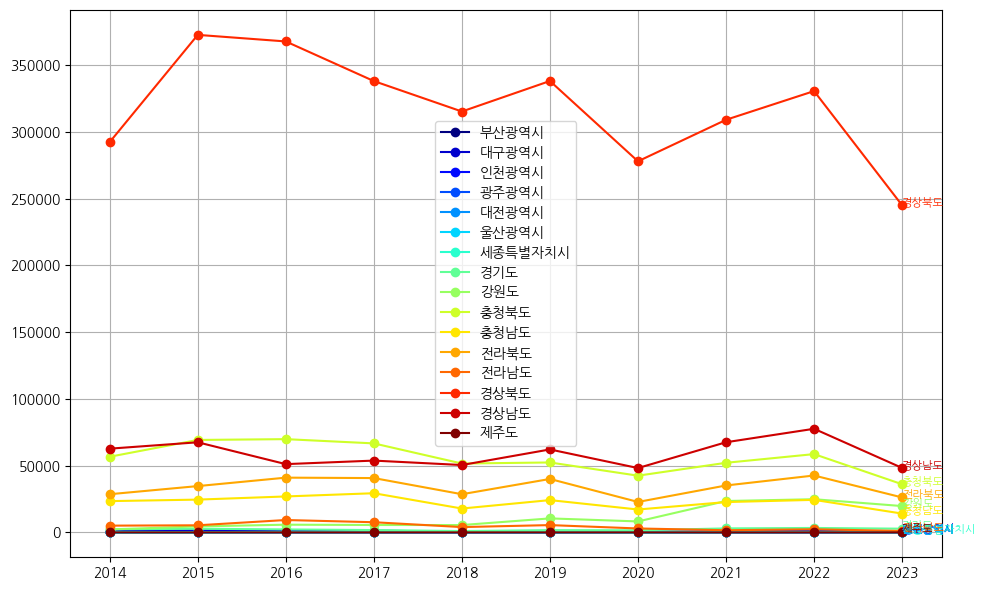

In [51]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')
ton_df2 = ton_df.drop(columns=['계'])

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(ton_df2.columns)-1))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(ton_df2.columns[1:], colors)):
    plt.plot(ton_df2.index, ton_df2[column], marker='o', label=column, color=color)
    plt.text(ton_df2.index[-1], ton_df2[column].iloc[-1], column, fontsize=8, color=color)

plt.xticks(ton_df2.index)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

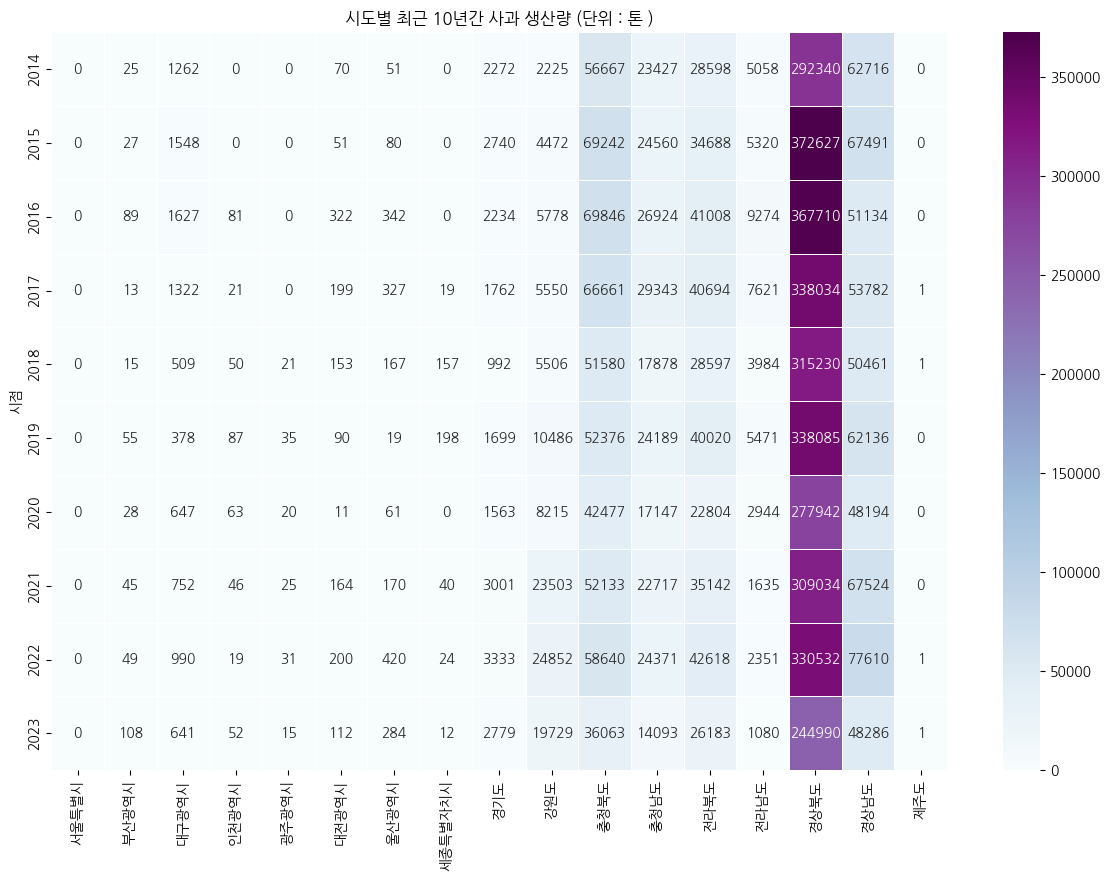

In [56]:
import seaborn as sns

plt.figure(figsize=(13,10))
heatmap = sns.heatmap(ton_df2,annot=True,fmt=".0f", linewidths=.5,cmap='BuPu')
plt.title("시도별 최근 10년간 사과 생산량 (단위 : 톤 )")
plt.autoscale() 
plt.tight_layout(pad=5)
plt.xlabel("")
plt.show()

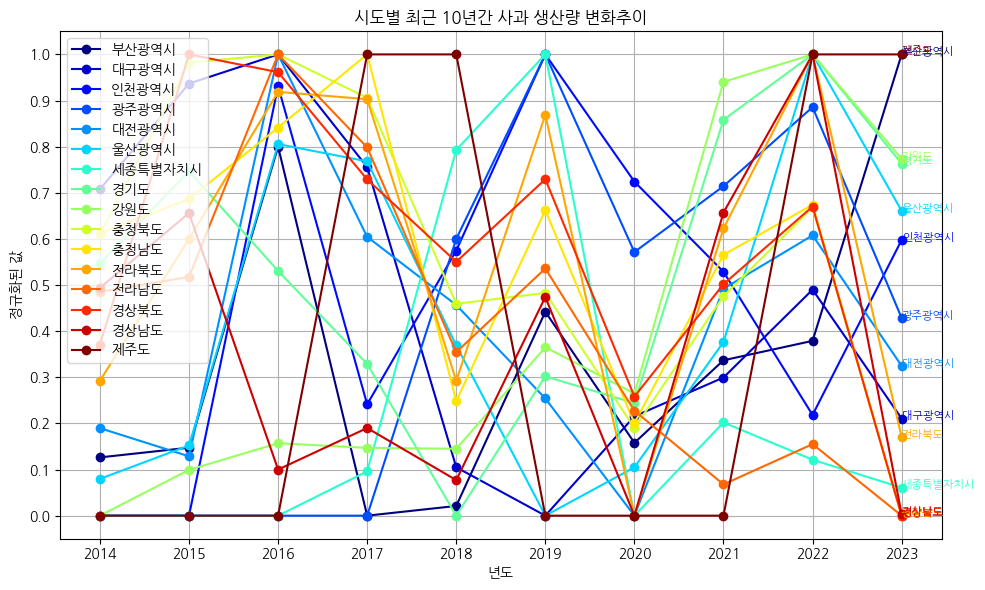

In [59]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.rc('font', family='NanumGothic')

# 열 데이터 정규화
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(ton_df.iloc[:, 1:]), columns=ton_df.columns[1:])
scaled_df.index = ton_df.index

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

colors = plt.cm.jet(np.linspace(0, 1, len(scaled_df.columns)-1))  # 각 열에 대해 다른 색상 생성

for i, (column, color) in enumerate(zip(scaled_df.columns[1:], colors)):
    plt.plot(scaled_df.index, scaled_df[column], marker='o', label=column, color=color)
    plt.text(scaled_df.index[-1], scaled_df[column].iloc[-1], column, fontsize=8, color=color)

plt.title("시도별 최근 10년간 사과 생산량 변화추이")
plt.xlabel("년도")
plt.ylabel("정규화된 값")
plt.xticks(scaled_df.index)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

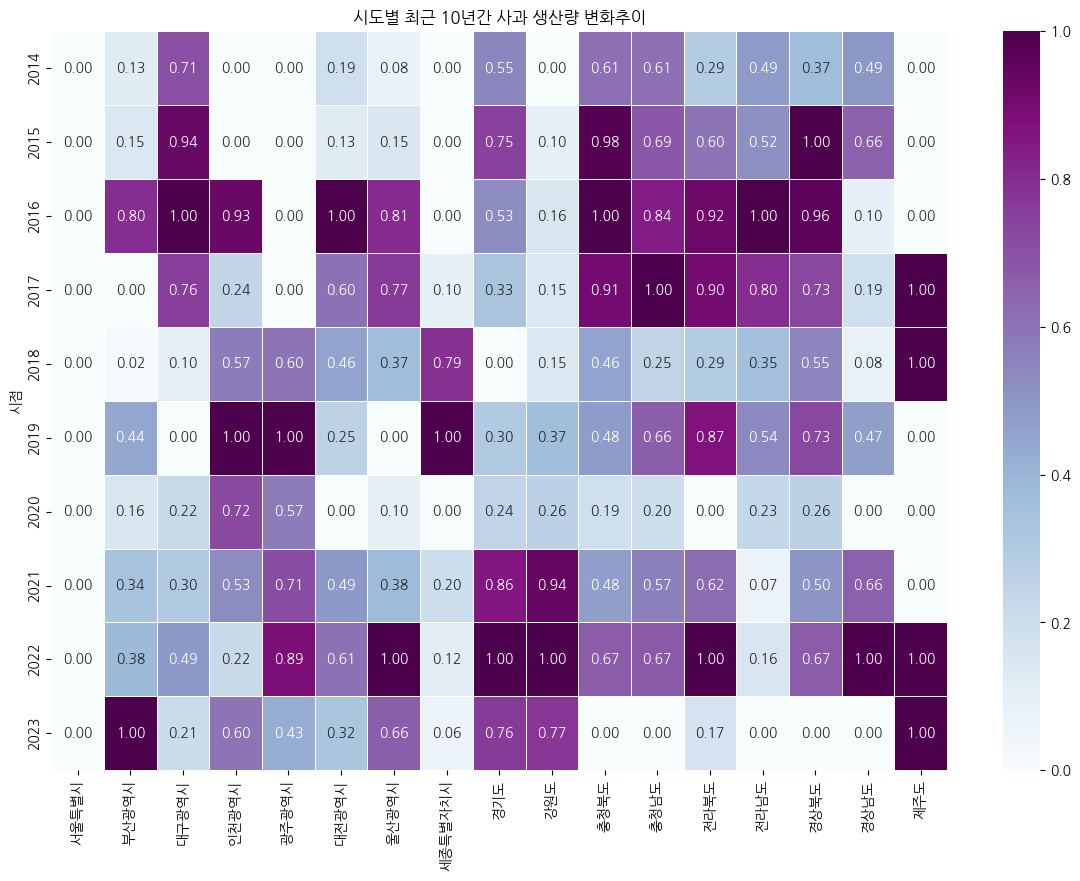

In [58]:
import seaborn as sns

plt.figure(figsize=(13,10))
heatmap = sns.heatmap(scaled_df,annot=True,fmt=".2f", linewidths=.5,cmap='BuPu')
plt.title("시도별 최근 10년간 사과 생산량 변화추이")
plt.autoscale() 
plt.tight_layout(pad=5)
plt.xlabel("")
plt.show()